In [1]:
import pandas as pd
import tensorflow as tf
import seaborn as sns
import numpy as np

import data

from matplotlib import pyplot as plt

#%matplotlib widget

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ["[Errno 2] The file to load file system plugin from does not exist.: '/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so'"]
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: cannot open shared object file: No such file or directory']
  warnings.warn(f"file s

In [2]:
dfo = data.merged()

## Explore the dataset

First, lets pick only the temperatures (for now, the rest looks messy and I don't wanna deal with that at this time)

In [3]:
cols = [
    'T3(Warm Water Header - In) (°C)',
    'T4(Warm Water Header - Out) (°C)',
    'T5(Chill Water Header - Out) (°C)',
    'T6(Chill Water Header - In) (°C)',
    'T7(Ground Source Loop - In) (°C)',
    'T8(Ground Source Loop - Out) (°C)',
]

df = dfo[cols].head(150000)

In [4]:
df

T3(Warm Water Header - In) (°C)  \
DATE &TIME                                                 
2010-02-01 00:00:45.752                        39.172123   
2010-02-01 00:01:45.752                        39.108808   
2010-02-01 00:02:45.752                        39.113483   
2010-02-01 00:03:45.752                        38.927906   
2010-02-01 00:04:45.752                        38.798430   
...                                                  ...   
2010-05-16 04:55:05.734                        44.231773   
2010-05-16 04:56:05.734                        44.185226   
2010-05-16 04:57:05.734                        44.173234   
2010-05-16 04:58:05.734                        44.157380   
2010-05-16 04:59:05.734                        44.145591   

                         T4(Warm Water Header - Out) (°C)  \
DATE &TIME                                                  
2010-02-01 00:00:45.752                         38.691460   
2010-02-01 00:01:45.752                         38.608212   
2010-02-01 00:02:45.752                         38.515146   
2010-02-01 00:03:45.752                         38.421467   
2010-02-01 00:04:45.752                         38.365730   
...                                                   ...   
2010-05-16 04:55:05.734                         44.090702   
2010-05-16 04:56:05.734                         44.060839   
2010-05-16 04:57:05.734                         44.043146   
2010-05-16 04:58:05.734                         44.021056   
2010-05-16 04:59:05.734                         43.993852   

                         T5(Chill Water Header - Out) (°C)  \
DATE &TIME                                                   
2010-02-01 00:00:45.752                          10.200813   
2010-02-01 00:01:45.752                          10.220193   
2010-02-01 00:02:45.752                          10.239061   
2010-02-01 00:03:45.752                          10.256390   
2010-02-01 00:04:45.752                          10.277821   
...                                                    ...   
2010-05-16 04:55:05.734                          10.321708   
2010-05-16 04:56:05.734                          10.331654   
2010-05-16 04:57:05.734                          10.340678   
2010-05-16 04:58:05.734                          10.347958   
2010-05-16 04:59:05.734                          10.359238   

                         T6(Chill Water Header - In) (°C)  \
DATE &TIME                                                  
2010-02-01 00:00:45.752                         11.972402   
2010-02-01 00:01:45.752                         11.669458   
2010-02-01 00:02:45.752                         11.878089   
2010-02-01 00:03:45.752                         12.061815   
2010-02-01 00:04:45.752                         11.922081   
...                                                   ...   
2010-05-16 04:55:05.734                          9.375077   
2010-05-16 04:56:05.734                          9.371709   
2010-05-16 04:57:05.734                          9.378282   
2010-05-16 04:58:05.734                          9.360869   
2010-05-16 04:59:05.734                          9.358471   

                         T7(Ground Source Loop - In) (°C)  \
DATE &TIME                                                  
2010-02-01 00:00:45.752                         11.884285   
2010-02-01 00:01:45.752                         11.884384   
2010-02-01 00:02:45.752                         11.887980   
2010-02-01 00:03:45.752                         11.889978   
2010-02-01 00:04:45.752                         11.895671   
...                                                   ...   
2010-05-16 04:55:05.734                         13.055378   
2010-05-16 04:56:05.734                         13.055777   
2010-05-16 04:57:05.734                         13.064866   
2010-05-16 04:58:05.734                         13.074954   
2010-05-16 04:59:05.734                         13.079249   

                         T8(Ground Source Loop - Out) (

In [5]:
df.describe().transpose()

count       mean        std   min  \
T3(Warm Water Header - In) (°C)    150000.0  36.878401  31.598972 -99.0   
T4(Warm Water Header - Out) (°C)   150000.0  36.298643  31.252295 -99.0   
T5(Chill Water Header - Out) (°C)  150000.0   5.324950  24.072579 -99.0   
T6(Chill Water Header - In) (°C)   150000.0   4.216308  23.809259 -99.0   
T7(Ground Source Loop - In) (°C)   150000.0   8.815882  24.703478 -99.0   
T8(Ground Source Loop - Out) (°C)  150000.0   7.882141  24.384312 -99.0   

                                         25%        50%        75%        max  
T3(Warm Water Header - In) (°C)    44.401266  46.152377  46.832383  55.516158  
T4(Warm Water Header - Out) (°C)   43.755435  45.018904  45.717945  51.960992  
T5(Chill Water Header - Out) (°C)   9.051576   9.446991  10.015626  28.300764  
T6(Chill Water Header - In) (°C)    7.800474   8.680777   9.313560  32.305868  
T7(Ground Source Loop - In) (°C)   12.219032  14.418340  15.687815  38.758297  
T8(Ground Source Loop - Out) (°C)  12.391298  13.114634  14.186880  18.370315

## Replace missing values

In [6]:
df = df.mask(df < -90, 0)
df = df.mask(df.isna(), 0)

In [7]:
print(df.describe().transpose())

                                      count       mean        std     min  \
T3(Warm Water Header - In) (°C)    150000.0  41.772301  11.361535 -0.3341   
T4(Warm Water Header - Out) (°C)   150000.0  41.192543  10.628734 -0.4937   
T5(Chill Water Header - Out) (°C)  150000.0  10.218850   4.349647 -0.6835   
T6(Chill Water Header - In) (°C)   150000.0   9.110208   4.142754 -0.5670   
T7(Ground Source Loop - In) (°C)   150000.0  13.703182   4.044470  0.0000   
T8(Ground Source Loop - Out) (°C)  150000.0  12.769441   3.133302  0.0000   

                                         25%        50%        75%        max  
T3(Warm Water Header - In) (°C)    44.401266  46.152377  46.832383  55.516158  
T4(Warm Water Header - Out) (°C)   43.755435  45.018904  45.717945  51.960992  
T5(Chill Water Header - Out) (°C)   9.051576   9.446991  10.015626  28.300764  
T6(Chill Water Header - In) (°C)    7.800474   8.680777   9.313560  32.305868  
T7(Ground Source Loop - In) (°C)   12.219032  14.418340  15.

In [8]:
#df.plot()

## Prepare the data
Split

In [9]:
column_indices = {name: i for i, name in enumerate(df.columns)}

n = len(df)
train_df = df[0:int(n*0.7)]
val_df = df[int(n*0.7):int(n*0.9)]
test_df = df[int(n*0.9):]

num_features = df.shape[1]

Normalize

In [10]:
train_mean = train_df.mean()
train_std = train_df.std()

train_df = (train_df - train_mean) / train_std
val_df = (val_df - train_mean) / train_std
test_df = (test_df - train_mean) / train_std

In [11]:
"""df_std = (df - train_mean) / train_std
df_std = df_std.melt(var_name='Column', value_name='Normalized')
plt.figure()
ax = sns.violinplot(x='Column', y='Normalized', data=df_std)
_ =ax.set_xticklabels(df.keys(), rotation=90)
"""

"df_std = (df - train_mean) / train_std\ndf_std = df_std.melt(var_name='Column', value_name='Normalized')\nplt.figure()\nax = sns.violinplot(x='Column', y='Normalized', data=df_std)\n_ =ax.set_xticklabels(df.keys(), rotation=90)\n"

In [12]:
class WindowGenerator:
    def __init__(
        self,
        input_width,
        label_width,
        shift,
        train_df=train_df,
        val_df=val_df,
        test_df=test_df,
        label_columns=None,
    ):
        # Store the raw data.
        self.train_df = train_df
        self.val_df = val_df
        self.test_df = test_df

        # Work out the label column indices.
        self.label_columns = label_columns
        if label_columns is not None:
            self.label_columns_indices = {
                name: i for i, name in enumerate(label_columns)
            }
        self.column_indices = {name: i for i, name in enumerate(train_df.columns)}

        # Work out the window parameters.
        self.input_width = input_width
        self.label_width = label_width
        self.shift = shift

        self.total_window_size = input_width + shift

        self.input_slice = slice(0, input_width)
        self.input_indices = np.arange(self.total_window_size)[self.input_slice]

        self.label_start = self.total_window_size - self.label_width
        self.labels_slice = slice(self.label_start, None)
        self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

    def __repr__(self):
        return "\n".join(
            [
                f"Total window size: {self.total_window_size}",
                f"Input indices: {self.input_indices}",
                f"Label indices: {self.label_indices}",
                f"Label column name(s): {self.label_columns}",
            ]
        )

    def split_window(self, features):
        inputs = features[:, self.input_slice, :]
        labels = features[:, self.labels_slice, :]
        if self.label_columns is not None:
            labels = tf.stack(
                [
                    labels[:, :, self.column_indices[name]]
                    for name in self.label_columns
                ],
                axis=-1,
            )

        # Slicing doesn't preserve static shape information, so set the shapes
        # manually. This way the `tf.data.Datasets` are easier to inspect.
        inputs.set_shape([None, self.input_width, None])
        labels.set_shape([None, self.label_width, None])

        return inputs, labels

    def plot(self, model=None, plot_col="T (degC)", max_subplots=3):
        inputs, labels = self.example
        plt.figure(figsize=(12, 8))
        plot_col_index = self.column_indices[plot_col]
        max_n = min(max_subplots, len(inputs))
        for n in range(max_n):
            plt.subplot(max_n, 1, n + 1)
            plt.ylabel(f"{plot_col} [normed]")
            plt.plot(
                self.input_indices,
                inputs[n, :, plot_col_index],
                label="Inputs",
                marker=".",
                zorder=-10,
            )

            if self.label_columns:
                label_col_index = self.label_columns_indices.get(plot_col, None)
            else:
                label_col_index = plot_col_index

            if label_col_index is None:
                continue

            plt.scatter(
                self.label_indices,
                labels[n, :, label_col_index],
                edgecolors="k",
                label="Labels",
                c="#2ca02c",
                s=64,
            )
            if model is not None:
                predictions = model(inputs)
                plt.scatter(
                    self.label_indices,
                    predictions[n, :, label_col_index],
                    marker="X",
                    edgecolors="k",
                    label="Predictions",
                    c="#ff7f0e",
                    s=64,
                )

            if n == 0:
                plt.legend()

        plt.xlabel("Time")

    def make_dataset(self, data):
        data = np.array(data, dtype=np.float32)
        ds = tf.keras.utils.timeseries_dataset_from_array(
            data=data,
            targets=None,
            sequence_length=self.total_window_size,
            sequence_stride=1,
            shuffle=True,
            batch_size=512,
        )

        ds = ds.map(self.split_window)

        return ds

    @property
    def train(self):
        return self.make_dataset(self.train_df)


    @property
    def val(self):
        return self.make_dataset(self.val_df)


    @property
    def test(self):
        return self.make_dataset(self.test_df)


    @property
    def example(self):
        """Get and cache an example batch of `inputs, labels` for plotting."""
        result = getattr(self, "_example", None)
        if result is None:
            # No example batch was found, so get one from the `.train` dataset
            result = next(iter(self.train))
            # And cache it for next time
            self._example = result
        return result

In [13]:
MAX_EPOCHS = 20

def compile_and_fit(model, window, patience=2):
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=patience,
                                                    mode='min')

    model.compile(loss=tf.keras.losses.MeanSquaredError(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=[tf.keras.metrics.MeanAbsoluteError()])

    history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[early_stopping])
    return history


Total window size: 180
Input indices: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119]
Label indices: [120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155
 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173
 174 175 176 177 178 179]
Label column name(s): None

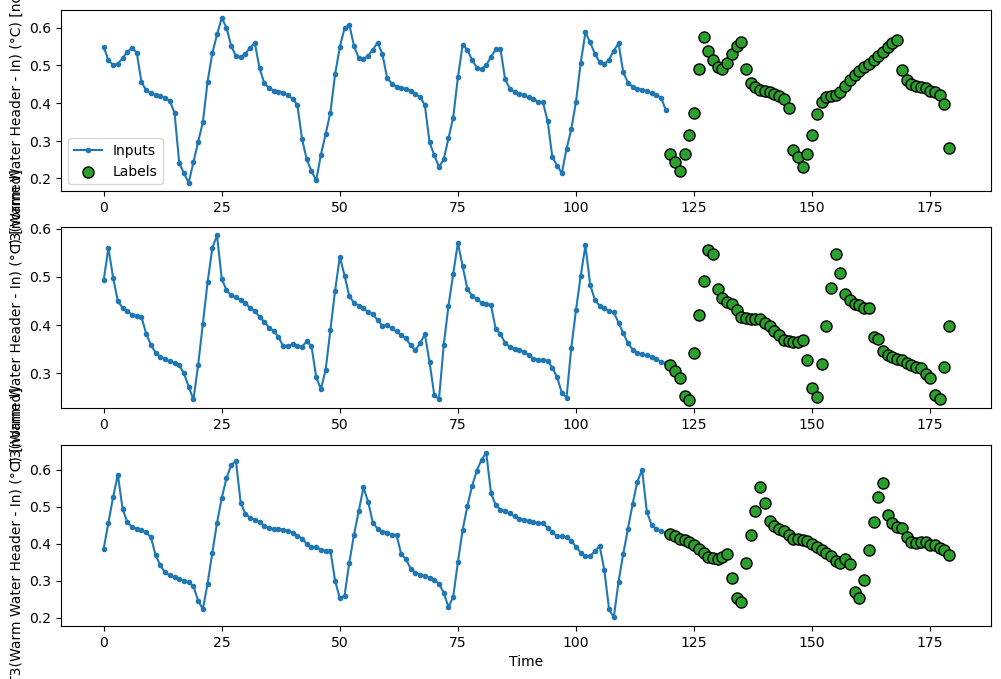

In [14]:
OUT_STEPS = 60
multi_window = WindowGenerator(input_width=120,
                               label_width=OUT_STEPS,
                               shift=OUT_STEPS)

multi_window.plot(plot_col=df.columns[0])
multi_window

## Eval

In [15]:
multi_val_performance = {}
multi_performance = {}


c1d-10-0.1-256
Epoch 1/20
205/205 [==============================] - 16s 70ms/step - loss: 0.1280 - mean_absolute_error: 0.1894 - val_loss: 0.0499 - val_mean_absolute_error: 0.1535
Epoch 2/20
205/205 [==============================] - 14s 64ms/step - loss: 0.0741 - mean_absolute_error: 0.1437 - val_loss: 0.0428 - val_mean_absolute_error: 0.1321
Epoch 3/20
205/205 [==============================] - 14s 65ms/step - loss: 0.0706 - mean_absolute_error: 0.1384 - val_loss: 0.0398 - val_mean_absolute_error: 0.1242
Epoch 4/20
205/205 [==============================] - 14s 68ms/step - loss: 0.0696 - mean_absolute_error: 0.1375 - val_loss: 0.0410 - val_mean_absolute_error: 0.1339
Epoch 5/20
59/59 [==============================] - 3s 43ms/step - loss: 0.0400 - mean_absolute_error: 0.1264


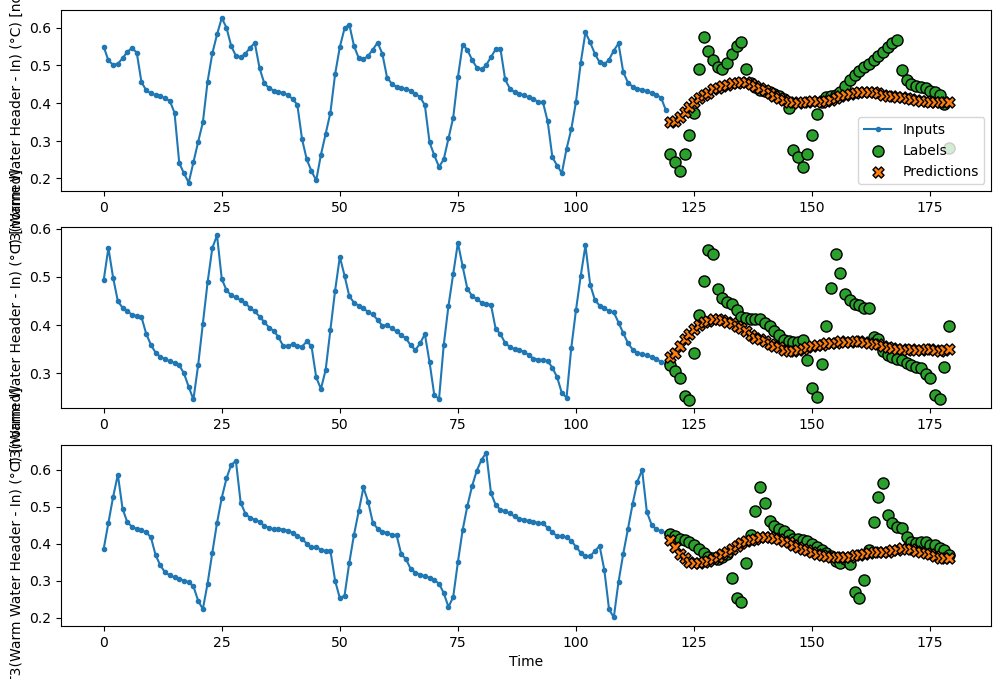

c1d-10-0.1-512
Epoch 1/20
205/205 [==============================] - 22s 100ms/step - loss: 0.1150 - mean_absolute_error: 0.1783 - val_loss: 0.0433 - val_mean_absolute_error: 0.1374
Epoch 2/20
205/205 [==============================] - 21s 101ms/step - loss: 0.0710 - mean_absolute_error: 0.1375 - val_loss: 0.0401 - val_mean_absolute_error: 0.1268
Epoch 3/20
205/205 [==============================] - 22s 104ms/step - loss: 0.0683 - mean_absolute_error: 0.1340 - val_loss: 0.0387 - val_mean_absolute_error: 0.1238
Epoch 4/20
205/205 [==============================] - 21s 102ms/step - loss: 0.0661 - mean_absolute_error: 0.1306 - val_loss: 0.0379 - val_mean_absolute_error: 0.1226
Epoch 5/20
205/205 [==============================] - 21s 101ms/step - loss: 0.0646 - mean_absolute_error: 0.1284 - val_loss: 0.0382 - val_mean_absolute_error: 0.1249
Epoch 6/20
59/59 [==============================] - 4s 59ms/step - loss: 0.0382 - mean_absolute_error: 0.1222


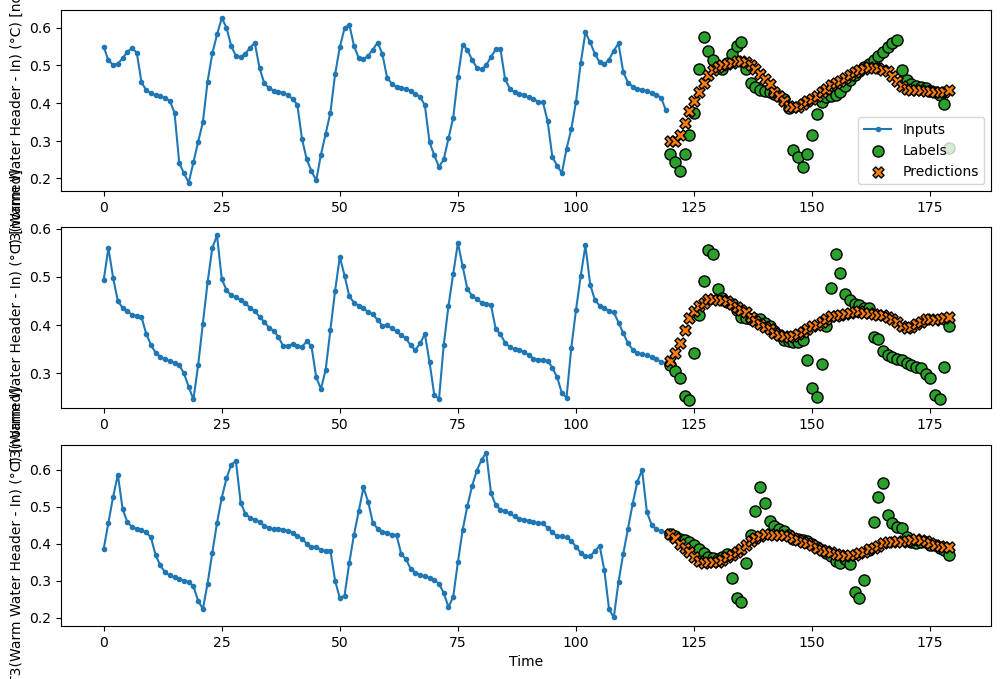

c1d-10-0.1-1024
Epoch 1/20
205/205 [==============================] - 35s 162ms/step - loss: 0.1078 - mean_absolute_error: 0.1710 - val_loss: 0.0407 - val_mean_absolute_error: 0.1274
Epoch 2/20
205/205 [==============================] - 32s 155ms/step - loss: 0.0694 - mean_absolute_error: 0.1350 - val_loss: 0.0463 - val_mean_absolute_error: 0.1482
Epoch 3/20
205/205 [==============================] - 32s 155ms/step - loss: 0.0665 - mean_absolute_error: 0.1306 - val_loss: 0.0389 - val_mean_absolute_error: 0.1256
Epoch 4/20
205/205 [==============================] - 32s 155ms/step - loss: 0.0646 - mean_absolute_error: 0.1286 - val_loss: 0.0397 - val_mean_absolute_error: 0.1333
Epoch 5/20
59/59 [==============================] - 5s 74ms/step - loss: 0.0395 - mean_absolute_error: 0.1266


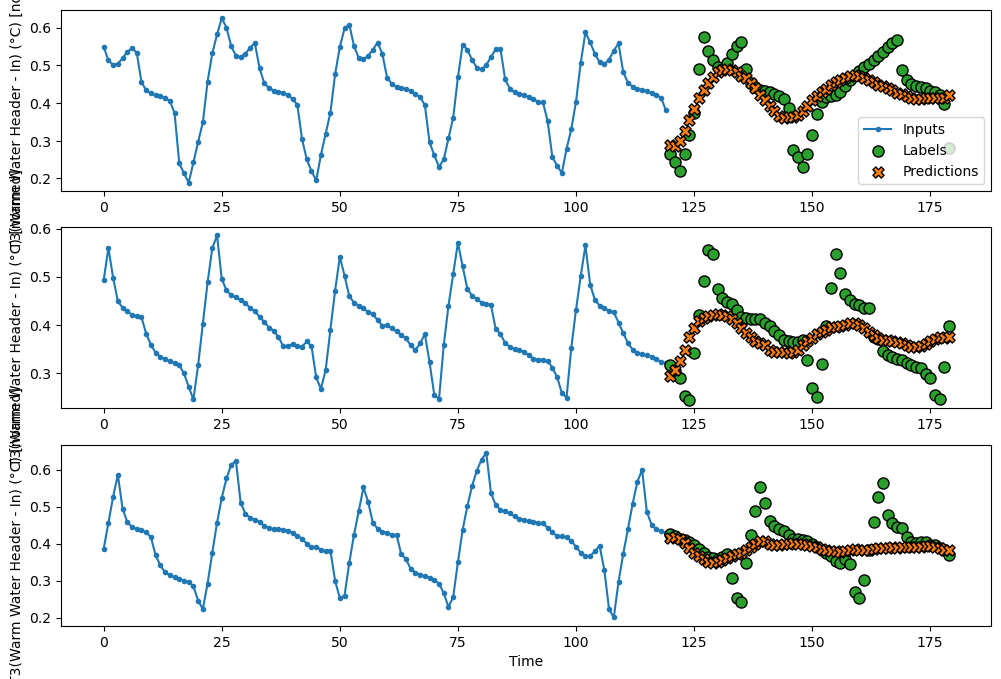

c1d-10-0.1-2048
Epoch 1/20
205/205 [==============================] - 59s 277ms/step - loss: 0.1011 - mean_absolute_error: 0.1650 - val_loss: 0.0411 - val_mean_absolute_error: 0.1334
Epoch 2/20
205/205 [==============================] - 53s 258ms/step - loss: 0.0673 - mean_absolute_error: 0.1314 - val_loss: 0.0398 - val_mean_absolute_error: 0.1255
Epoch 3/20
205/205 [==============================] - 52s 249ms/step - loss: 0.0647 - mean_absolute_error: 0.1277 - val_loss: 0.0392 - val_mean_absolute_error: 0.1291
Epoch 4/20
205/205 [==============================] - 52s 252ms/step - loss: 0.0639 - mean_absolute_error: 0.1268 - val_loss: 0.0382 - val_mean_absolute_error: 0.1234
Epoch 5/20
205/205 [==============================] - 52s 249ms/step - loss: 0.0634 - mean_absolute_error: 0.1267 - val_loss: 0.0402 - val_mean_absolute_error: 0.1335
Epoch 6/20
205/205 [==============================] - 52s 253ms/step - loss: 0.0627 - mean_absolute_error: 0.1251 - val_loss: 0.0374 - val_mean_absol

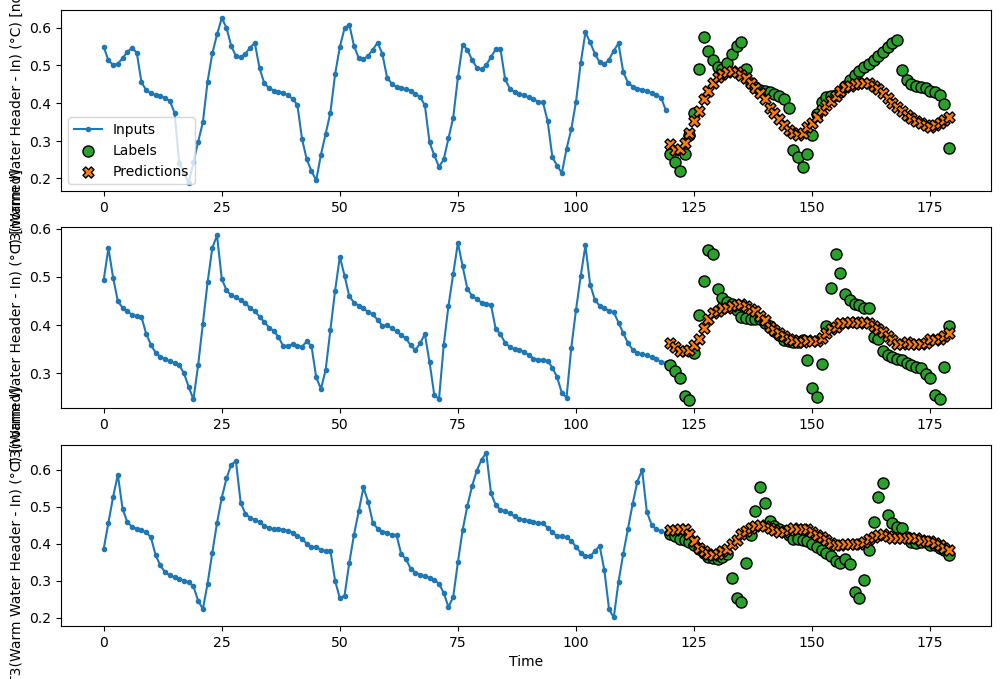

c1d-10-0.2-256
Epoch 1/20
205/205 [==============================] - 17s 74ms/step - loss: 0.1347 - mean_absolute_error: 0.2009 - val_loss: 0.0508 - val_mean_absolute_error: 0.1571
Epoch 2/20
205/205 [==============================] - 16s 76ms/step - loss: 0.0800 - mean_absolute_error: 0.1547 - val_loss: 0.0430 - val_mean_absolute_error: 0.1370
Epoch 3/20
205/205 [==============================] - 16s 76ms/step - loss: 0.0765 - mean_absolute_error: 0.1499 - val_loss: 0.0433 - val_mean_absolute_error: 0.1417
Epoch 4/20
205/205 [==============================] - 16s 75ms/step - loss: 0.0747 - mean_absolute_error: 0.1475 - val_loss: 0.0426 - val_mean_absolute_error: 0.1363
Epoch 5/20
205/205 [==============================] - 16s 76ms/step - loss: 0.0732 - mean_absolute_error: 0.1454 - val_loss: 0.0428 - val_mean_absolute_error: 0.1354
Epoch 6/20
59/59 [==============================] - 3s 49ms/step - loss: 0.0429 - mean_absolute_error: 0.1374


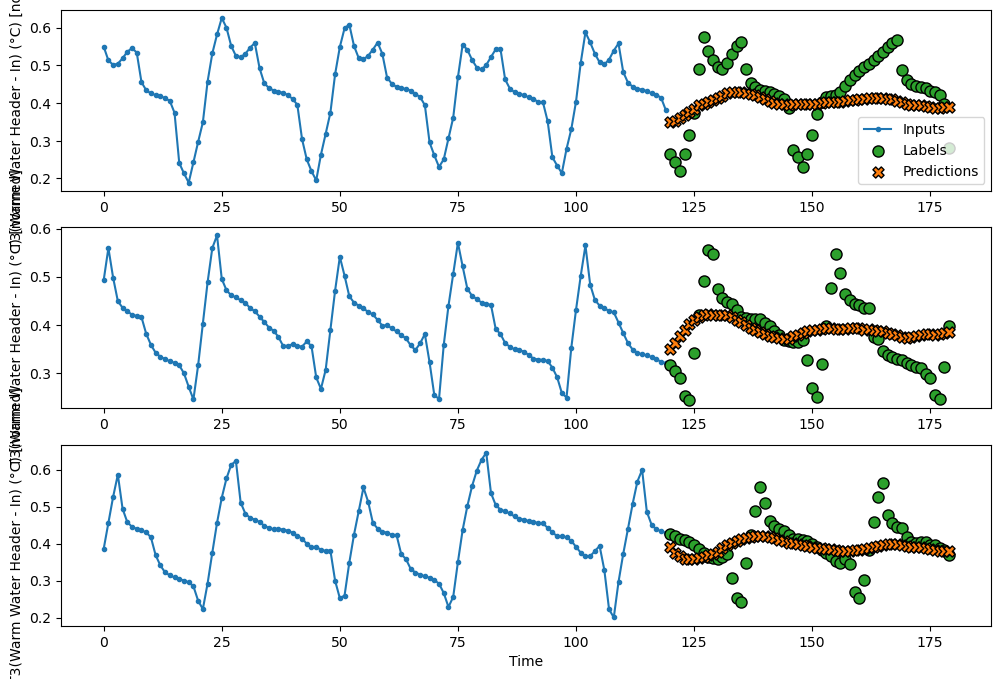

c1d-10-0.2-512
Epoch 1/20
205/205 [==============================] - 19s 88ms/step - loss: 0.1168 - mean_absolute_error: 0.1844 - val_loss: 0.0460 - val_mean_absolute_error: 0.1477
Epoch 2/20
205/205 [==============================] - 19s 90ms/step - loss: 0.0747 - mean_absolute_error: 0.1456 - val_loss: 0.0422 - val_mean_absolute_error: 0.1309
Epoch 3/20
205/205 [==============================] - 19s 89ms/step - loss: 0.0713 - mean_absolute_error: 0.1405 - val_loss: 0.0402 - val_mean_absolute_error: 0.1293
Epoch 4/20
205/205 [==============================] - 19s 89ms/step - loss: 0.0699 - mean_absolute_error: 0.1390 - val_loss: 0.0396 - val_mean_absolute_error: 0.1276
Epoch 5/20
205/205 [==============================] - 19s 89ms/step - loss: 0.0683 - mean_absolute_error: 0.1367 - val_loss: 0.0395 - val_mean_absolute_error: 0.1310
Epoch 6/20
205/205 [==============================] - 19s 90ms/step - loss: 0.0676 - mean_absolute_error: 0.1354 - val_loss: 0.0383 - val_mean_absolute_err

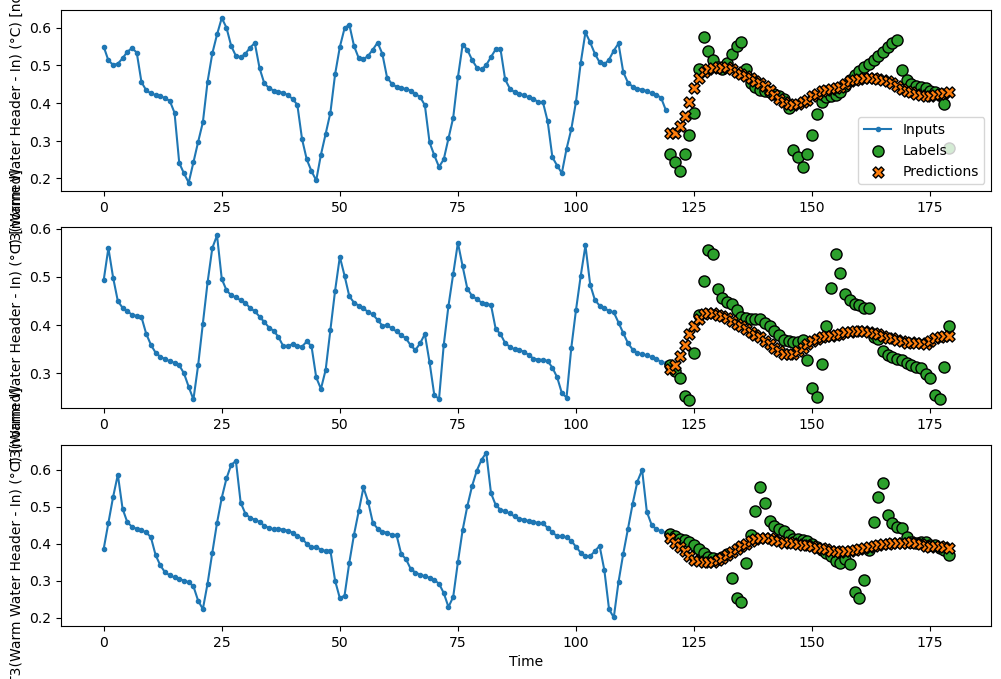

c1d-10-0.2-1024
Epoch 1/20
205/205 [==============================] - 28s 130ms/step - loss: 0.1104 - mean_absolute_error: 0.1762 - val_loss: 0.0439 - val_mean_absolute_error: 0.1412
Epoch 2/20
205/205 [==============================] - 27s 128ms/step - loss: 0.0721 - mean_absolute_error: 0.1402 - val_loss: 0.0404 - val_mean_absolute_error: 0.1270
Epoch 3/20
205/205 [==============================] - 27s 131ms/step - loss: 0.0684 - mean_absolute_error: 0.1349 - val_loss: 0.0419 - val_mean_absolute_error: 0.1331
Epoch 4/20
205/205 [==============================] - 27s 129ms/step - loss: 0.0679 - mean_absolute_error: 0.1349 - val_loss: 0.0383 - val_mean_absolute_error: 0.1284
Epoch 5/20
205/205 [==============================] - 26s 126ms/step - loss: 0.0661 - mean_absolute_error: 0.1318 - val_loss: 0.0382 - val_mean_absolute_error: 0.1258
Epoch 6/20
205/205 [==============================] - 23s 113ms/step - loss: 0.0656 - mean_absolute_error: 0.1320 - val_loss: 0.0400 - val_mean_absol

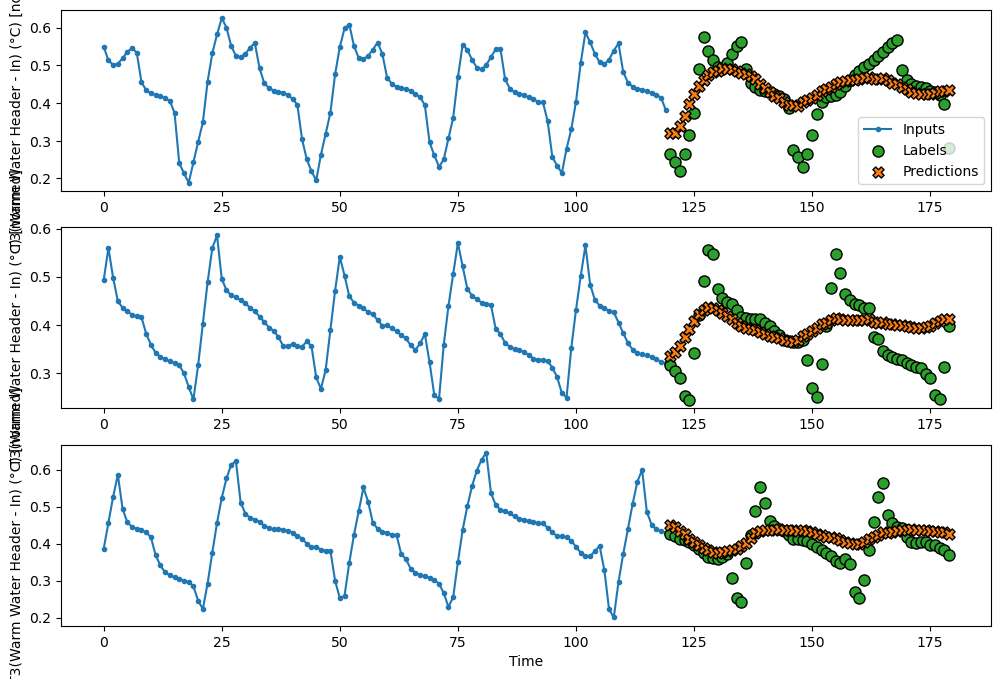

c1d-10-0.2-2048
Epoch 1/20
205/205 [==============================] - 53s 252ms/step - loss: 0.1035 - mean_absolute_error: 0.1677 - val_loss: 0.0404 - val_mean_absolute_error: 0.1307
Epoch 2/20
205/205 [==============================] - 52s 250ms/step - loss: 0.0702 - mean_absolute_error: 0.1372 - val_loss: 0.0437 - val_mean_absolute_error: 0.1465
Epoch 3/20
205/205 [==============================] - 52s 250ms/step - loss: 0.0687 - mean_absolute_error: 0.1348 - val_loss: 0.0386 - val_mean_absolute_error: 0.1263
Epoch 4/20
205/205 [==============================] - 52s 252ms/step - loss: 0.0653 - mean_absolute_error: 0.1299 - val_loss: 0.0385 - val_mean_absolute_error: 0.1287
Epoch 5/20
205/205 [==============================] - 55s 268ms/step - loss: 0.0654 - mean_absolute_error: 0.1304 - val_loss: 0.0381 - val_mean_absolute_error: 0.1237
Epoch 6/20
205/205 [==============================] - 55s 266ms/step - loss: 0.0642 - mean_absolute_error: 0.1282 - val_loss: 0.0414 - val_mean_absol

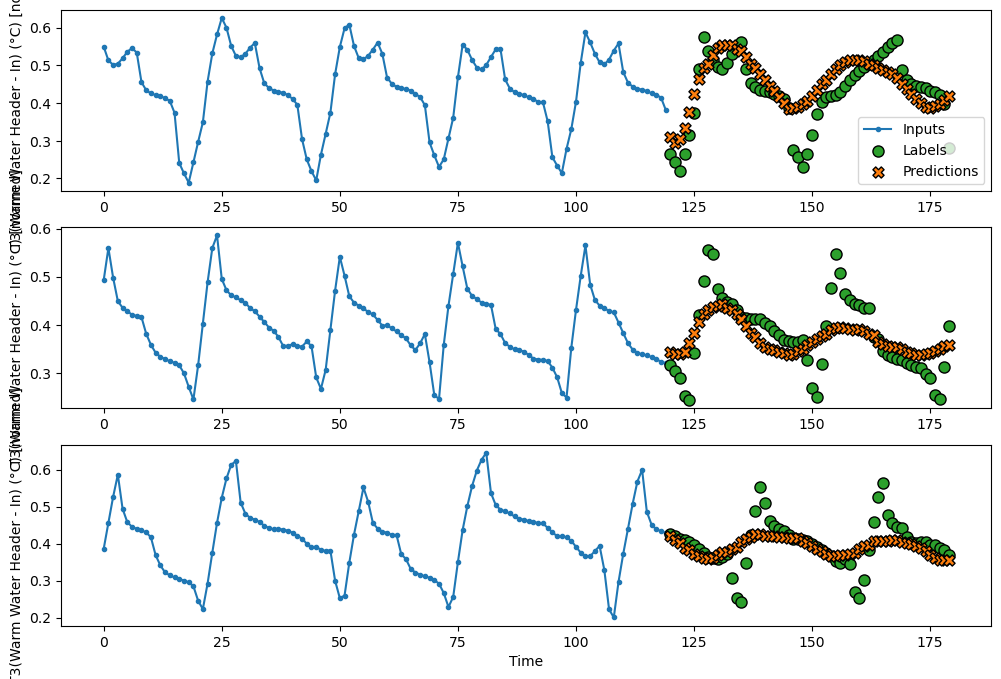

c1d-10-0.3-256
Epoch 1/20
205/205 [==============================] - 13s 58ms/step - loss: 0.1408 - mean_absolute_error: 0.2110 - val_loss: 0.0531 - val_mean_absolute_error: 0.1624
Epoch 2/20
205/205 [==============================] - 12s 59ms/step - loss: 0.0857 - mean_absolute_error: 0.1644 - val_loss: 0.0466 - val_mean_absolute_error: 0.1451
Epoch 3/20
205/205 [==============================] - 12s 57ms/step - loss: 0.0815 - mean_absolute_error: 0.1591 - val_loss: 0.0464 - val_mean_absolute_error: 0.1489
Epoch 4/20
205/205 [==============================] - 12s 57ms/step - loss: 0.0799 - mean_absolute_error: 0.1560 - val_loss: 0.0456 - val_mean_absolute_error: 0.1449
Epoch 5/20
205/205 [==============================] - 12s 57ms/step - loss: 0.0786 - mean_absolute_error: 0.1541 - val_loss: 0.0431 - val_mean_absolute_error: 0.1363
Epoch 6/20
205/205 [==============================] - 12s 58ms/step - loss: 0.0777 - mean_absolute_error: 0.1526 - val_loss: 0.0453 - val_mean_absolute_err

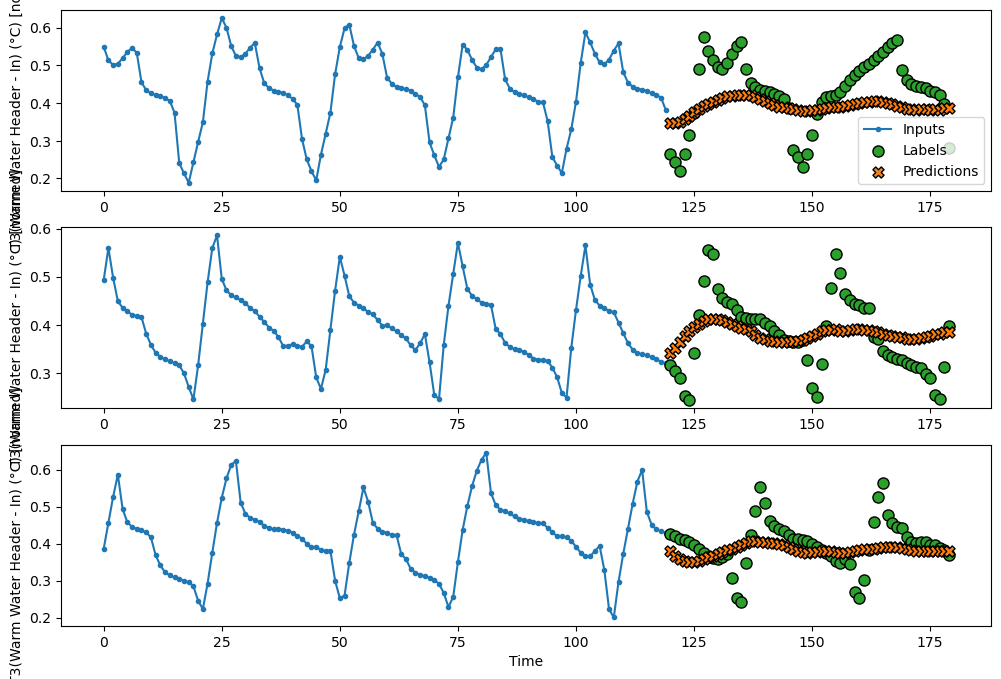

c1d-10-0.3-512
Epoch 1/20
205/205 [==============================] - 16s 72ms/step - loss: 0.1222 - mean_absolute_error: 0.1919 - val_loss: 0.0462 - val_mean_absolute_error: 0.1466
Epoch 2/20
205/205 [==============================] - 15s 71ms/step - loss: 0.0787 - mean_absolute_error: 0.1527 - val_loss: 0.0444 - val_mean_absolute_error: 0.1412
Epoch 3/20
205/205 [==============================] - 15s 71ms/step - loss: 0.0757 - mean_absolute_error: 0.1494 - val_loss: 0.0411 - val_mean_absolute_error: 0.1306
Epoch 4/20
205/205 [==============================] - 15s 71ms/step - loss: 0.0733 - mean_absolute_error: 0.1451 - val_loss: 0.0417 - val_mean_absolute_error: 0.1365
Epoch 5/20
59/59 [==============================] - 3s 40ms/step - loss: 0.0428 - mean_absolute_error: 0.1397


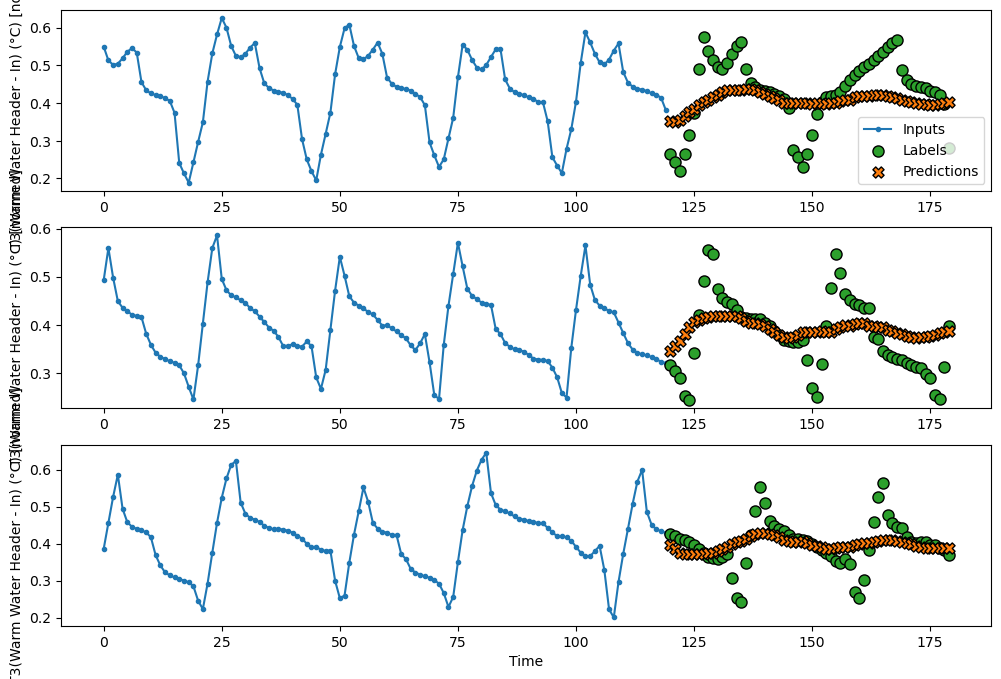

c1d-10-0.3-1024
Epoch 1/20
205/205 [==============================] - 23s 108ms/step - loss: 0.1115 - mean_absolute_error: 0.1795 - val_loss: 0.0443 - val_mean_absolute_error: 0.1376
Epoch 2/20
205/205 [==============================] - 22s 107ms/step - loss: 0.0742 - mean_absolute_error: 0.1453 - val_loss: 0.0425 - val_mean_absolute_error: 0.1345
Epoch 3/20
205/205 [==============================] - 22s 107ms/step - loss: 0.0714 - mean_absolute_error: 0.1405 - val_loss: 0.0417 - val_mean_absolute_error: 0.1313
Epoch 4/20
205/205 [==============================] - 22s 108ms/step - loss: 0.0710 - mean_absolute_error: 0.1403 - val_loss: 0.0431 - val_mean_absolute_error: 0.1434
Epoch 5/20
205/205 [==============================] - 22s 107ms/step - loss: 0.0695 - mean_absolute_error: 0.1385 - val_loss: 0.0416 - val_mean_absolute_error: 0.1327
Epoch 6/20
205/205 [==============================] - 22s 108ms/step - loss: 0.0684 - mean_absolute_error: 0.1367 - val_loss: 0.0380 - val_mean_absol

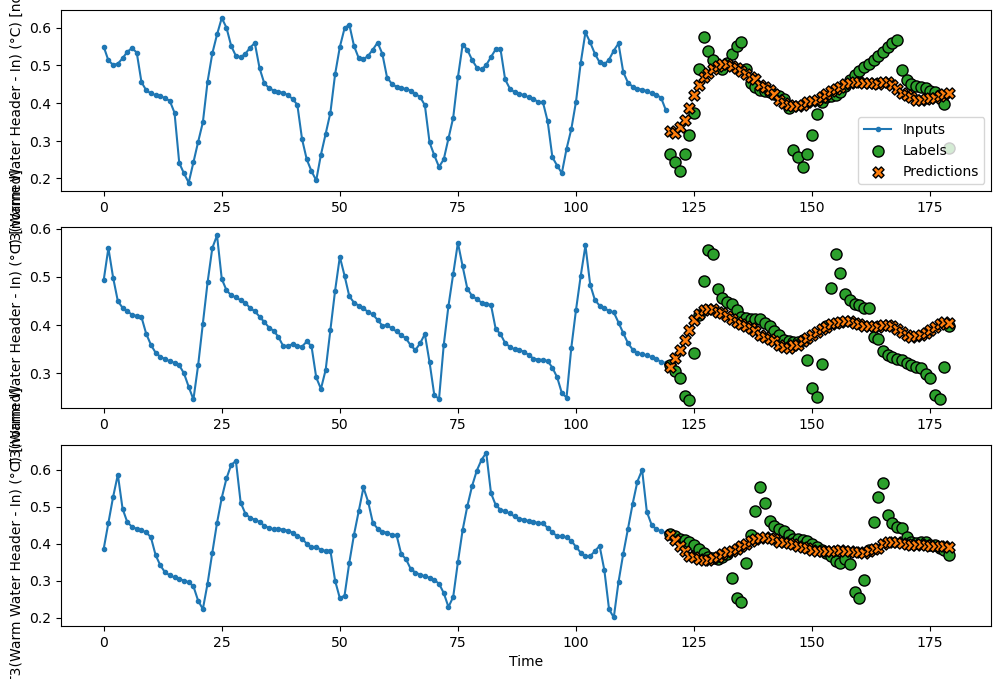

c1d-10-0.3-2048
Epoch 1/20
205/205 [==============================] - 50s 239ms/step - loss: 0.1025 - mean_absolute_error: 0.1698 - val_loss: 0.0415 - val_mean_absolute_error: 0.1305
Epoch 2/20
205/205 [==============================] - 49s 239ms/step - loss: 0.0727 - mean_absolute_error: 0.1416 - val_loss: 0.0411 - val_mean_absolute_error: 0.1326
Epoch 3/20
205/205 [==============================] - 49s 238ms/step - loss: 0.0700 - mean_absolute_error: 0.1374 - val_loss: 0.0392 - val_mean_absolute_error: 0.1303
Epoch 4/20
205/205 [==============================] - 49s 239ms/step - loss: 0.0686 - mean_absolute_error: 0.1360 - val_loss: 0.0379 - val_mean_absolute_error: 0.1268
Epoch 5/20
205/205 [==============================] - 50s 240ms/step - loss: 0.0666 - mean_absolute_error: 0.1333 - val_loss: 0.0401 - val_mean_absolute_error: 0.1351
Epoch 6/20
59/59 [==============================] - 5s 86ms/step - loss: 0.0382 - mean_absolute_error: 0.1301


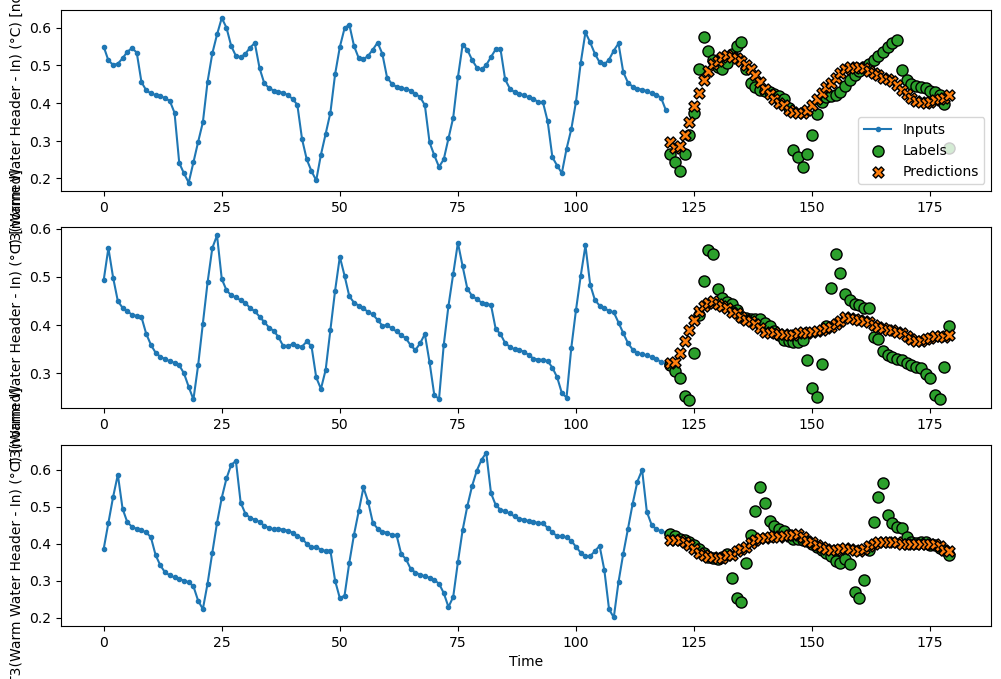

c1d-20-0.1-256
Epoch 1/20
205/205 [==============================] - 14s 60ms/step - loss: 0.1254 - mean_absolute_error: 0.1871 - val_loss: 0.0560 - val_mean_absolute_error: 0.1657
Epoch 2/20
205/205 [==============================] - 12s 58ms/step - loss: 0.0743 - mean_absolute_error: 0.1434 - val_loss: 0.0433 - val_mean_absolute_error: 0.1372
Epoch 3/20
205/205 [==============================] - 12s 58ms/step - loss: 0.0706 - mean_absolute_error: 0.1386 - val_loss: 0.0409 - val_mean_absolute_error: 0.1306
Epoch 4/20
205/205 [==============================] - 12s 58ms/step - loss: 0.0692 - mean_absolute_error: 0.1369 - val_loss: 0.0385 - val_mean_absolute_error: 0.1237
Epoch 5/20
205/205 [==============================] - 12s 58ms/step - loss: 0.0672 - mean_absolute_error: 0.1340 - val_loss: 0.0384 - val_mean_absolute_error: 0.1259
Epoch 6/20
205/205 [==============================] - 13s 60ms/step - loss: 0.0674 - mean_absolute_error: 0.1349 - val_loss: 0.0379 - val_mean_absolute_err

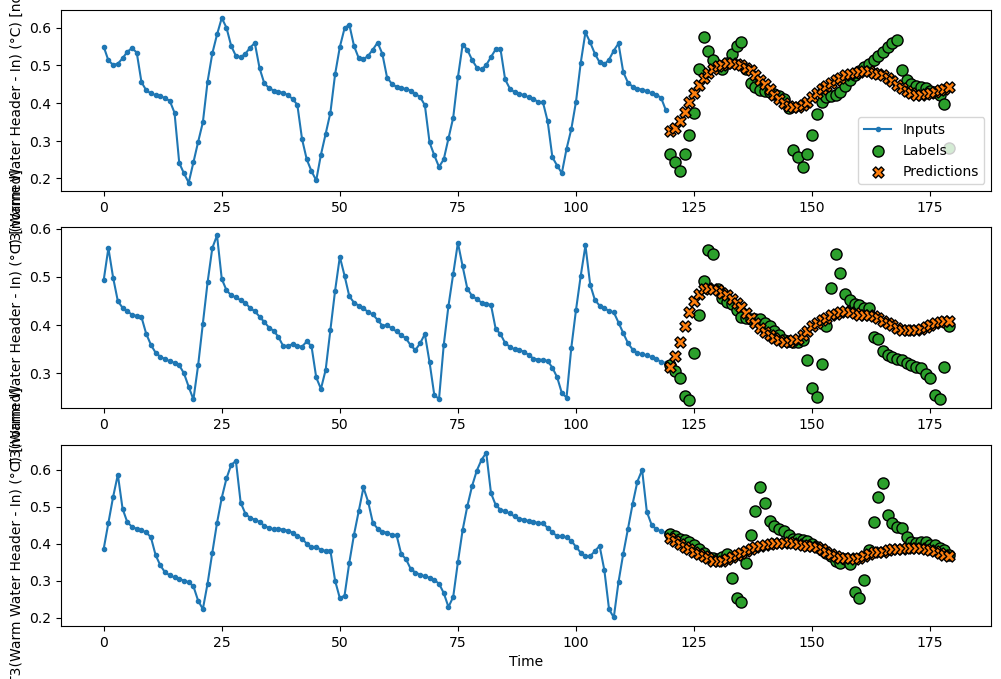

c1d-20-0.1-512
Epoch 1/20
205/205 [==============================] - 16s 73ms/step - loss: 0.1133 - mean_absolute_error: 0.1767 - val_loss: 0.0467 - val_mean_absolute_error: 0.1436
Epoch 2/20
205/205 [==============================] - 15s 71ms/step - loss: 0.0703 - mean_absolute_error: 0.1367 - val_loss: 0.0380 - val_mean_absolute_error: 0.1220
Epoch 3/20
205/205 [==============================] - 15s 73ms/step - loss: 0.0686 - mean_absolute_error: 0.1345 - val_loss: 0.0386 - val_mean_absolute_error: 0.1314
Epoch 4/20
205/205 [==============================] - 15s 71ms/step - loss: 0.0667 - mean_absolute_error: 0.1324 - val_loss: 0.0378 - val_mean_absolute_error: 0.1263
Epoch 5/20
205/205 [==============================] - 15s 72ms/step - loss: 0.0644 - mean_absolute_error: 0.1288 - val_loss: 0.0362 - val_mean_absolute_error: 0.1181
Epoch 6/20
205/205 [==============================] - 15s 71ms/step - loss: 0.0640 - mean_absolute_error: 0.1288 - val_loss: 0.0375 - val_mean_absolute_err

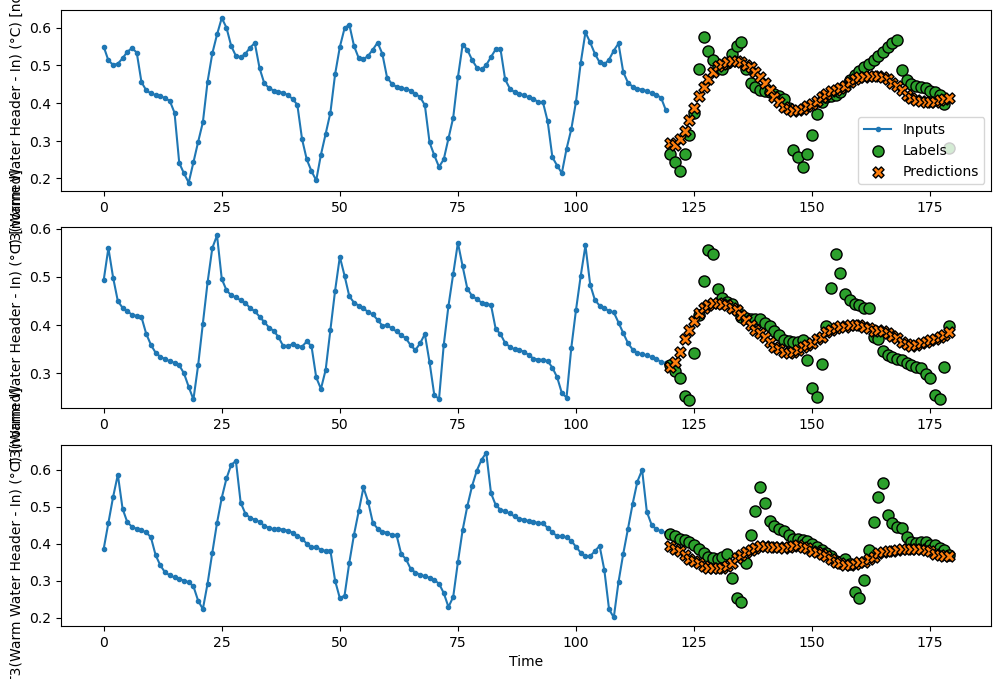

c1d-20-0.1-1024
Epoch 1/20
205/205 [==============================] - 24s 110ms/step - loss: 0.1075 - mean_absolute_error: 0.1698 - val_loss: 0.0428 - val_mean_absolute_error: 0.1365
Epoch 2/20
205/205 [==============================] - 23s 109ms/step - loss: 0.0682 - mean_absolute_error: 0.1325 - val_loss: 0.0373 - val_mean_absolute_error: 0.1221
Epoch 3/20
205/205 [==============================] - 23s 110ms/step - loss: 0.0665 - mean_absolute_error: 0.1312 - val_loss: 0.0378 - val_mean_absolute_error: 0.1243
Epoch 4/20
59/59 [==============================] - 3s 54ms/step - loss: 0.0376 - mean_absolute_error: 0.1217


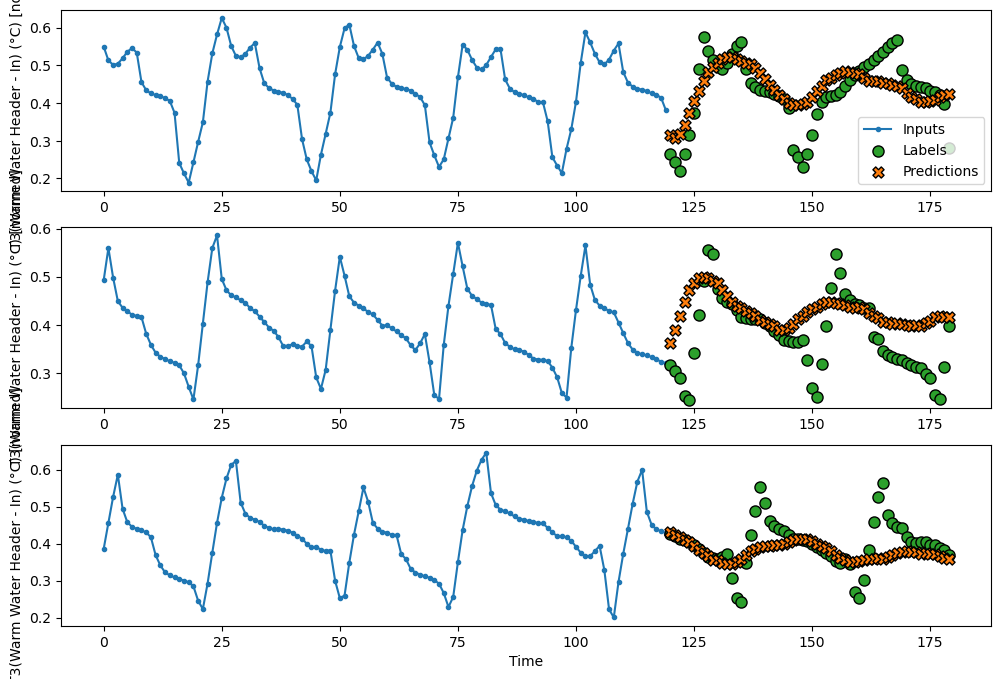

c1d-20-0.1-2048
Epoch 1/20
205/205 [==============================] - 51s 244ms/step - loss: 0.1009 - mean_absolute_error: 0.1645 - val_loss: 0.0429 - val_mean_absolute_error: 0.1363
Epoch 2/20
205/205 [==============================] - 50s 240ms/step - loss: 0.0693 - mean_absolute_error: 0.1351 - val_loss: 0.0428 - val_mean_absolute_error: 0.1324
Epoch 3/20
205/205 [==============================] - 49s 239ms/step - loss: 0.0650 - mean_absolute_error: 0.1283 - val_loss: 0.0390 - val_mean_absolute_error: 0.1297
Epoch 4/20
205/205 [==============================] - 49s 238ms/step - loss: 0.0630 - mean_absolute_error: 0.1260 - val_loss: 0.0388 - val_mean_absolute_error: 0.1308
Epoch 5/20
205/205 [==============================] - 50s 241ms/step - loss: 0.0631 - mean_absolute_error: 0.1259 - val_loss: 0.0375 - val_mean_absolute_error: 0.1284
Epoch 6/20
205/205 [==============================] - 49s 239ms/step - loss: 0.0614 - mean_absolute_error: 0.1233 - val_loss: 0.0429 - val_mean_absol

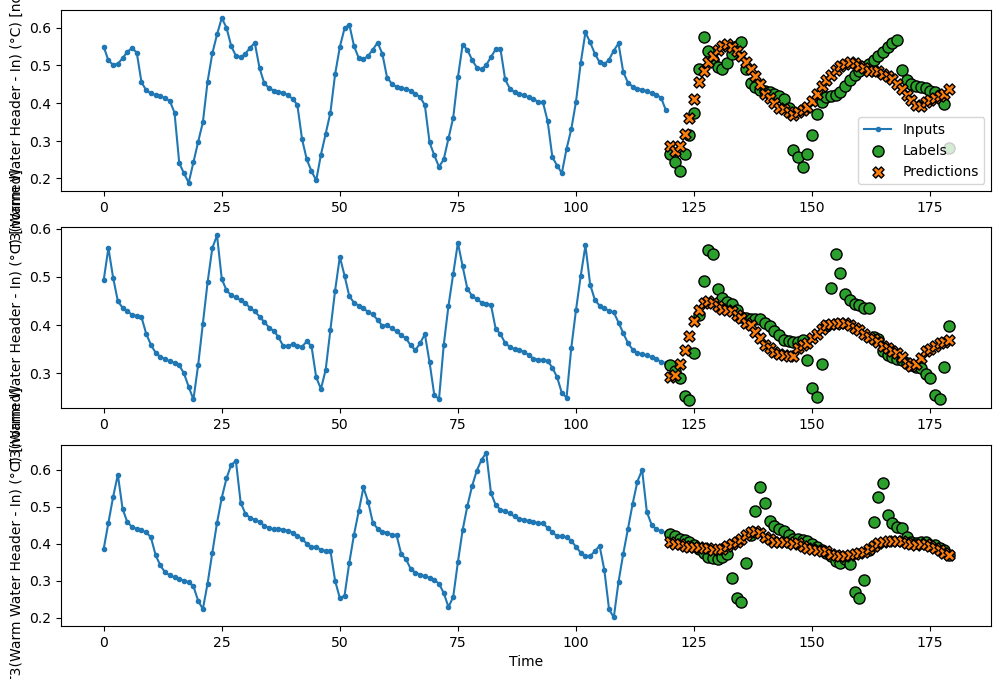

c1d-20-0.2-256
Epoch 1/20
205/205 [==============================] - 14s 62ms/step - loss: 0.1297 - mean_absolute_error: 0.1967 - val_loss: 0.0503 - val_mean_absolute_error: 0.1586
Epoch 2/20
205/205 [==============================] - 12s 60ms/step - loss: 0.0795 - mean_absolute_error: 0.1544 - val_loss: 0.0436 - val_mean_absolute_error: 0.1377
Epoch 3/20
205/205 [==============================] - 12s 59ms/step - loss: 0.0759 - mean_absolute_error: 0.1492 - val_loss: 0.0392 - val_mean_absolute_error: 0.1284
Epoch 4/20
205/205 [==============================] - 13s 60ms/step - loss: 0.0747 - mean_absolute_error: 0.1471 - val_loss: 0.0401 - val_mean_absolute_error: 0.1297
Epoch 5/20
205/205 [==============================] - 13s 60ms/step - loss: 0.0730 - mean_absolute_error: 0.1449 - val_loss: 0.0390 - val_mean_absolute_error: 0.1281
Epoch 6/20
205/205 [==============================] - 13s 60ms/step - loss: 0.0721 - mean_absolute_error: 0.1437 - val_loss: 0.0381 - val_mean_absolute_err

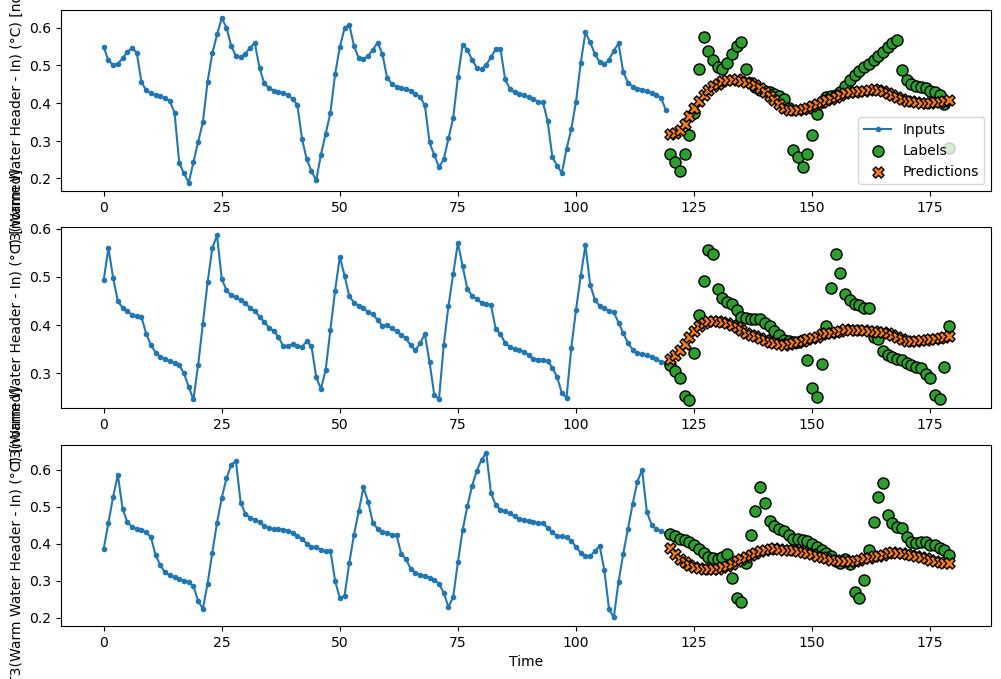

c1d-20-0.2-512
Epoch 1/20
205/205 [==============================] - 16s 73ms/step - loss: 0.1160 - mean_absolute_error: 0.1824 - val_loss: 0.0471 - val_mean_absolute_error: 0.1432
Epoch 2/20
205/205 [==============================] - 15s 72ms/step - loss: 0.0738 - mean_absolute_error: 0.1440 - val_loss: 0.0397 - val_mean_absolute_error: 0.1288
Epoch 3/20
205/205 [==============================] - 15s 73ms/step - loss: 0.0720 - mean_absolute_error: 0.1418 - val_loss: 0.0386 - val_mean_absolute_error: 0.1261
Epoch 4/20
205/205 [==============================] - 15s 73ms/step - loss: 0.0701 - mean_absolute_error: 0.1392 - val_loss: 0.0386 - val_mean_absolute_error: 0.1254
Epoch 5/20
205/205 [==============================] - 15s 72ms/step - loss: 0.0698 - mean_absolute_error: 0.1385 - val_loss: 0.0378 - val_mean_absolute_error: 0.1220
Epoch 6/20
205/205 [==============================] - 15s 73ms/step - loss: 0.0676 - mean_absolute_error: 0.1358 - val_loss: 0.0379 - val_mean_absolute_err

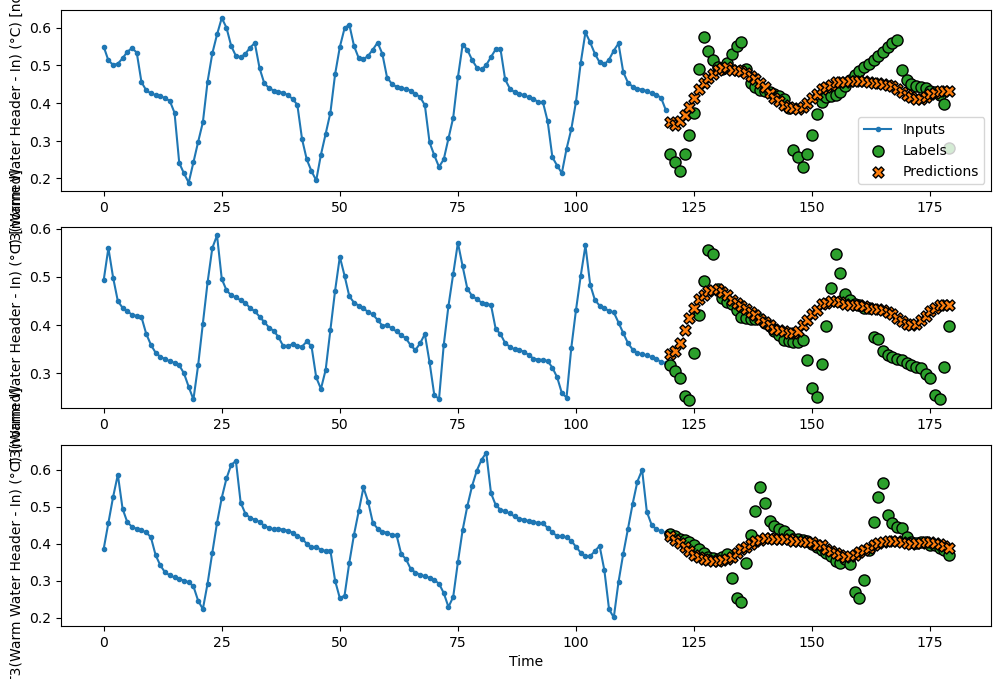

c1d-20-0.2-1024
Epoch 1/20
205/205 [==============================] - 24s 111ms/step - loss: 0.1080 - mean_absolute_error: 0.1737 - val_loss: 0.0435 - val_mean_absolute_error: 0.1362
Epoch 2/20
205/205 [==============================] - 23s 111ms/step - loss: 0.0718 - mean_absolute_error: 0.1402 - val_loss: 0.0383 - val_mean_absolute_error: 0.1254
Epoch 3/20
205/205 [==============================] - 23s 111ms/step - loss: 0.0688 - mean_absolute_error: 0.1355 - val_loss: 0.0373 - val_mean_absolute_error: 0.1248
Epoch 4/20
205/205 [==============================] - 23s 110ms/step - loss: 0.0681 - mean_absolute_error: 0.1351 - val_loss: 0.0395 - val_mean_absolute_error: 0.1287
Epoch 5/20
59/59 [==============================] - 3s 53ms/step - loss: 0.0391 - mean_absolute_error: 0.1248


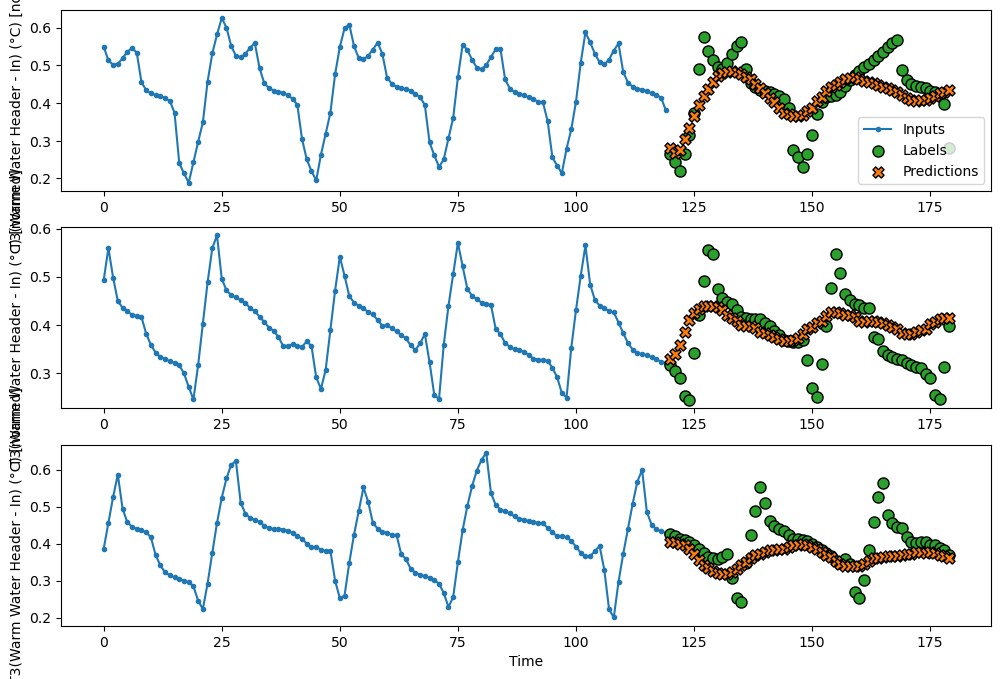

c1d-20-0.2-2048
Epoch 1/20
205/205 [==============================] - 52s 245ms/step - loss: 0.0999 - mean_absolute_error: 0.1670 - val_loss: 0.0387 - val_mean_absolute_error: 0.1237
Epoch 2/20
205/205 [==============================] - 51s 249ms/step - loss: 0.0713 - mean_absolute_error: 0.1391 - val_loss: 0.0442 - val_mean_absolute_error: 0.1386
Epoch 3/20
59/59 [==============================] - 6s 90ms/step - loss: 0.0398 - mean_absolute_error: 0.1237


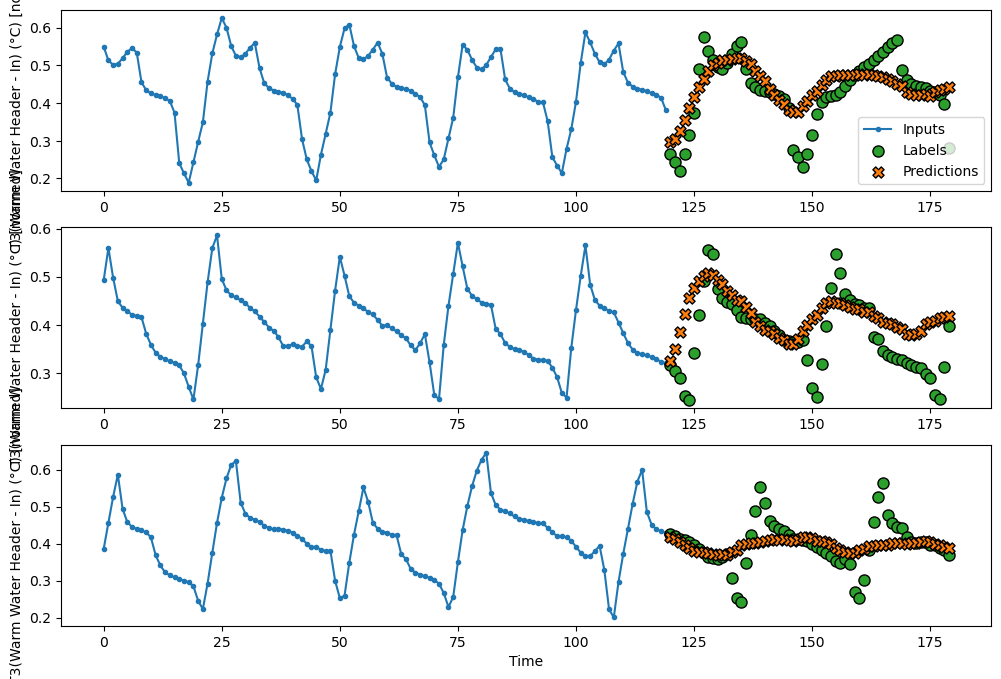

c1d-20-0.3-256
Epoch 1/20
205/205 [==============================] - 14s 61ms/step - loss: 0.1349 - mean_absolute_error: 0.2066 - val_loss: 0.0522 - val_mean_absolute_error: 0.1609
Epoch 2/20
205/205 [==============================] - 12s 59ms/step - loss: 0.0866 - mean_absolute_error: 0.1651 - val_loss: 0.0463 - val_mean_absolute_error: 0.1465
Epoch 3/20
205/205 [==============================] - 13s 60ms/step - loss: 0.0830 - mean_absolute_error: 0.1594 - val_loss: 0.0447 - val_mean_absolute_error: 0.1479
Epoch 4/20
205/205 [==============================] - 12s 59ms/step - loss: 0.0815 - mean_absolute_error: 0.1578 - val_loss: 0.0419 - val_mean_absolute_error: 0.1341
Epoch 5/20
205/205 [==============================] - 13s 60ms/step - loss: 0.0793 - mean_absolute_error: 0.1543 - val_loss: 0.0419 - val_mean_absolute_error: 0.1342
Epoch 6/20
205/205 [==============================] - 13s 61ms/step - loss: 0.0791 - mean_absolute_error: 0.1536 - val_loss: 0.0412 - val_mean_absolute_err

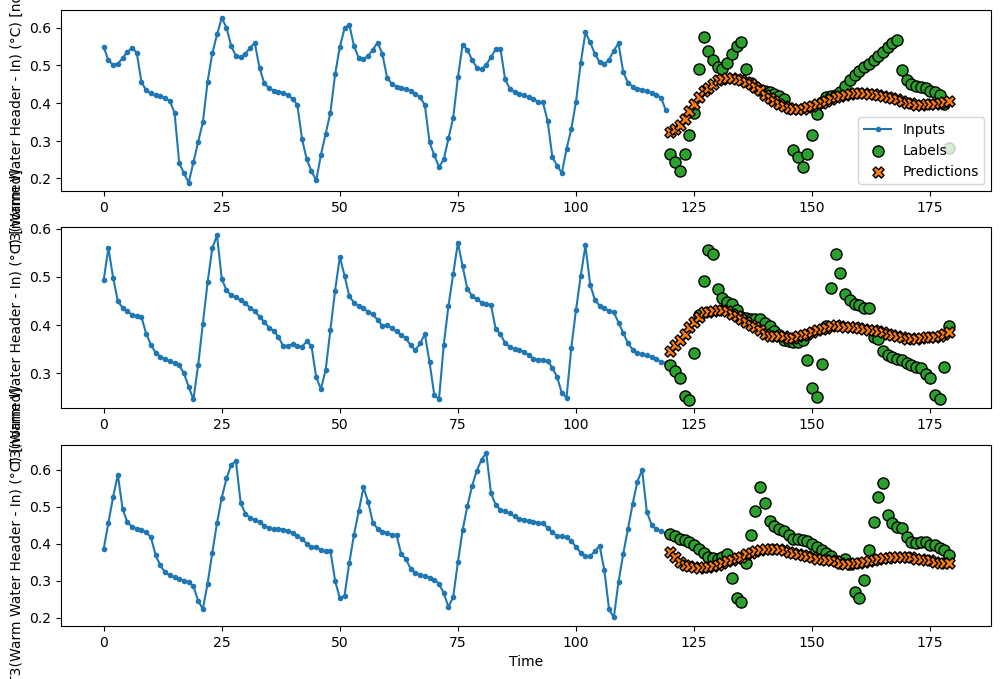

c1d-20-0.3-512
Epoch 1/20
205/205 [==============================] - 17s 75ms/step - loss: 0.1200 - mean_absolute_error: 0.1890 - val_loss: 0.0450 - val_mean_absolute_error: 0.1423
Epoch 2/20
205/205 [==============================] - 15s 73ms/step - loss: 0.0792 - mean_absolute_error: 0.1535 - val_loss: 0.0393 - val_mean_absolute_error: 0.1257
Epoch 3/20
205/205 [==============================] - 15s 73ms/step - loss: 0.0753 - mean_absolute_error: 0.1481 - val_loss: 0.0408 - val_mean_absolute_error: 0.1304
Epoch 4/20
59/59 [==============================] - 3s 42ms/step - loss: 0.0407 - mean_absolute_error: 0.1367


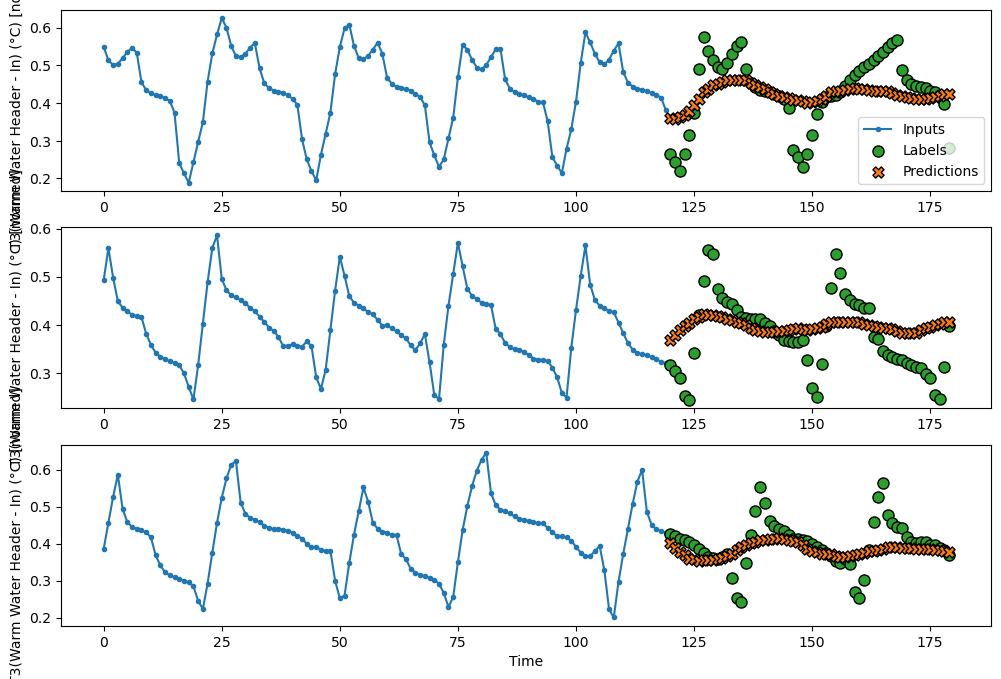

c1d-20-0.3-1024
Epoch 1/20
205/205 [==============================] - 25s 113ms/step - loss: 0.1102 - mean_absolute_error: 0.1787 - val_loss: 0.0434 - val_mean_absolute_error: 0.1342
Epoch 2/20
205/205 [==============================] - 23s 111ms/step - loss: 0.0753 - mean_absolute_error: 0.1468 - val_loss: 0.0472 - val_mean_absolute_error: 0.1447
Epoch 3/20
205/205 [==============================] - 23s 111ms/step - loss: 0.0741 - mean_absolute_error: 0.1445 - val_loss: 0.0399 - val_mean_absolute_error: 0.1313
Epoch 4/20
205/205 [==============================] - 23s 111ms/step - loss: 0.0705 - mean_absolute_error: 0.1398 - val_loss: 0.0378 - val_mean_absolute_error: 0.1231
Epoch 5/20
205/205 [==============================] - 23s 111ms/step - loss: 0.0703 - mean_absolute_error: 0.1394 - val_loss: 0.0395 - val_mean_absolute_error: 0.1285
Epoch 6/20
59/59 [==============================] - 4s 54ms/step - loss: 0.0447 - mean_absolute_error: 0.1474


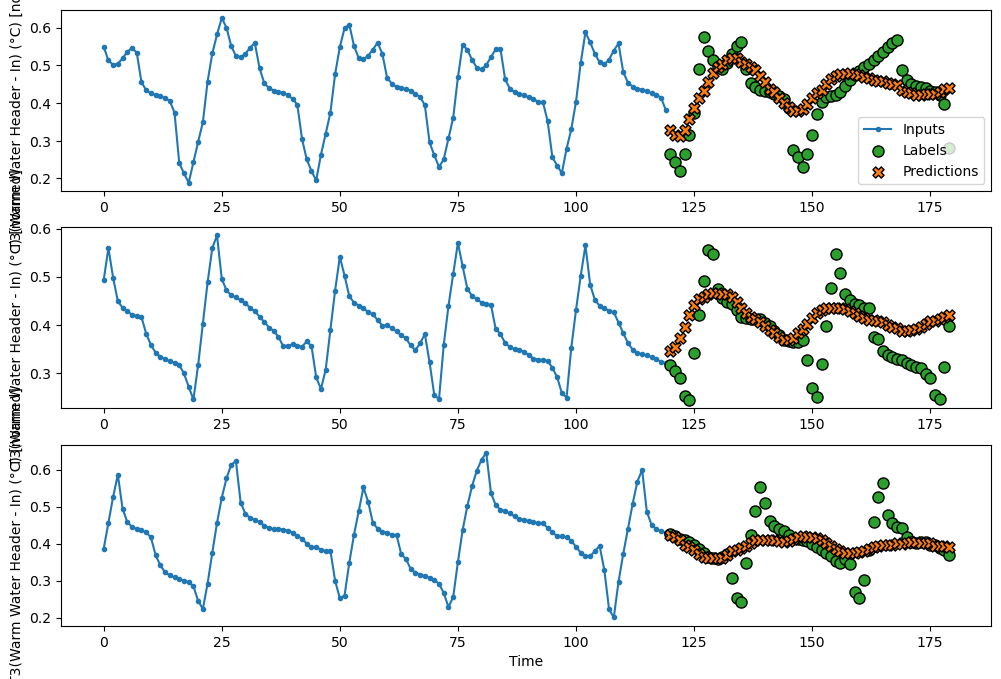

c1d-20-0.3-2048
Epoch 1/20
205/205 [==============================] - 51s 243ms/step - loss: 0.1048 - mean_absolute_error: 0.1725 - val_loss: 0.0417 - val_mean_absolute_error: 0.1305
Epoch 2/20
205/205 [==============================] - 50s 244ms/step - loss: 0.0740 - mean_absolute_error: 0.1438 - val_loss: 0.0407 - val_mean_absolute_error: 0.1339
Epoch 3/20
205/205 [==============================] - 51s 245ms/step - loss: 0.0714 - mean_absolute_error: 0.1395 - val_loss: 0.0412 - val_mean_absolute_error: 0.1325
Epoch 4/20
205/205 [==============================] - 51s 246ms/step - loss: 0.0694 - mean_absolute_error: 0.1370 - val_loss: 0.0398 - val_mean_absolute_error: 0.1297
Epoch 5/20
205/205 [==============================] - 50s 244ms/step - loss: 0.0701 - mean_absolute_error: 0.1383 - val_loss: 0.0413 - val_mean_absolute_error: 0.1330
Epoch 6/20
59/59 [==============================] - 6s 88ms/step - loss: 0.0398 - mean_absolute_error: 0.1332


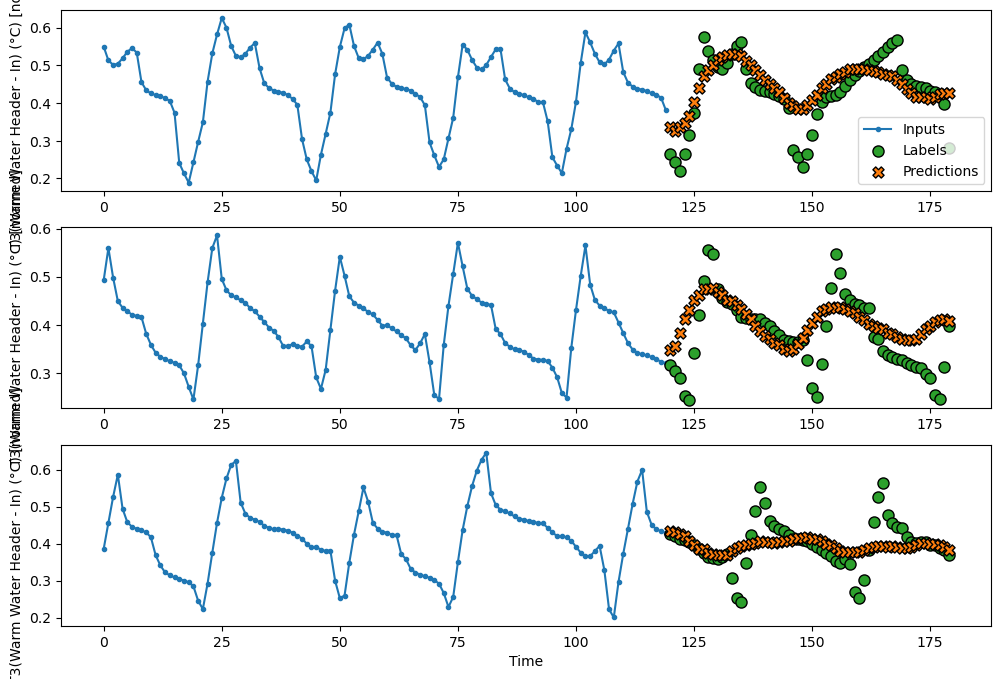

c1d-30-0.1-256
Epoch 1/20
205/205 [==============================] - 14s 61ms/step - loss: 0.1244 - mean_absolute_error: 0.1860 - val_loss: 0.0502 - val_mean_absolute_error: 0.1533
Epoch 2/20
205/205 [==============================] - 13s 60ms/step - loss: 0.0742 - mean_absolute_error: 0.1437 - val_loss: 0.0400 - val_mean_absolute_error: 0.1273
Epoch 3/20
205/205 [==============================] - 13s 60ms/step - loss: 0.0709 - mean_absolute_error: 0.1391 - val_loss: 0.0399 - val_mean_absolute_error: 0.1300
Epoch 4/20
205/205 [==============================] - 13s 60ms/step - loss: 0.0693 - mean_absolute_error: 0.1372 - val_loss: 0.0392 - val_mean_absolute_error: 0.1274
Epoch 5/20
205/205 [==============================] - 13s 63ms/step - loss: 0.0668 - mean_absolute_error: 0.1337 - val_loss: 0.0390 - val_mean_absolute_error: 0.1274
Epoch 6/20
205/205 [==============================] - 13s 61ms/step - loss: 0.0678 - mean_absolute_error: 0.1362 - val_loss: 0.0396 - val_mean_absolute_err

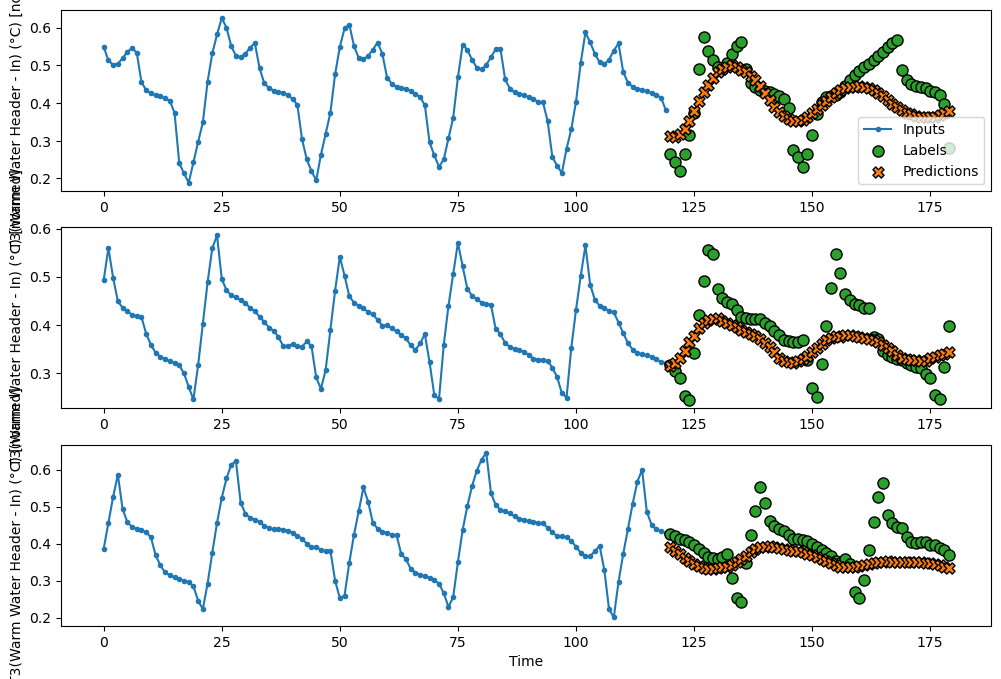

c1d-30-0.1-512
Epoch 1/20
205/205 [==============================] - 16s 69ms/step - loss: 0.1149 - mean_absolute_error: 0.1767 - val_loss: 0.0463 - val_mean_absolute_error: 0.1437
Epoch 2/20
205/205 [==============================] - 14s 68ms/step - loss: 0.0713 - mean_absolute_error: 0.1387 - val_loss: 0.0391 - val_mean_absolute_error: 0.1236
Epoch 3/20
205/205 [==============================] - 15s 69ms/step - loss: 0.0688 - mean_absolute_error: 0.1359 - val_loss: 0.0428 - val_mean_absolute_error: 0.1351
Epoch 4/20
205/205 [==============================] - 15s 70ms/step - loss: 0.0662 - mean_absolute_error: 0.1321 - val_loss: 0.0369 - val_mean_absolute_error: 0.1177
Epoch 5/20
205/205 [==============================] - 15s 70ms/step - loss: 0.0645 - mean_absolute_error: 0.1298 - val_loss: 0.0362 - val_mean_absolute_error: 0.1192
Epoch 6/20
205/205 [==============================] - 14s 69ms/step - loss: 0.0642 - mean_absolute_error: 0.1294 - val_loss: 0.0358 - val_mean_absolute_err

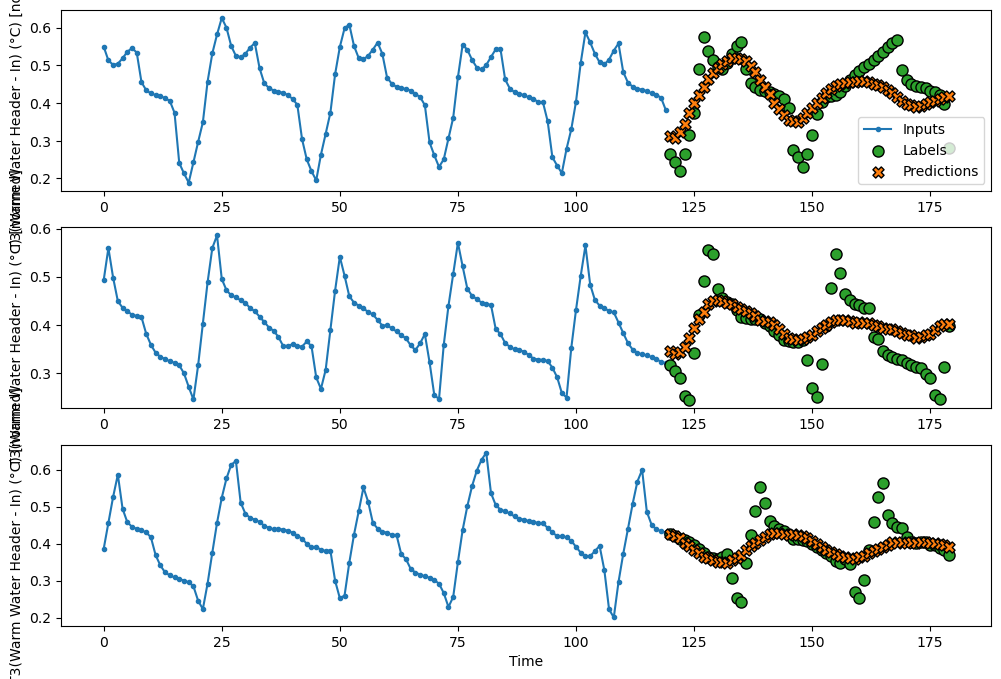

c1d-30-0.1-1024
Epoch 1/20
205/205 [==============================] - 23s 108ms/step - loss: 0.1045 - mean_absolute_error: 0.1680 - val_loss: 0.0435 - val_mean_absolute_error: 0.1349
Epoch 2/20
205/205 [==============================] - 22s 108ms/step - loss: 0.0710 - mean_absolute_error: 0.1380 - val_loss: 0.0396 - val_mean_absolute_error: 0.1327
Epoch 3/20
205/205 [==============================] - 22s 107ms/step - loss: 0.0666 - mean_absolute_error: 0.1320 - val_loss: 0.0427 - val_mean_absolute_error: 0.1340
Epoch 4/20
59/59 [==============================] - 3s 48ms/step - loss: 0.0400 - mean_absolute_error: 0.1289


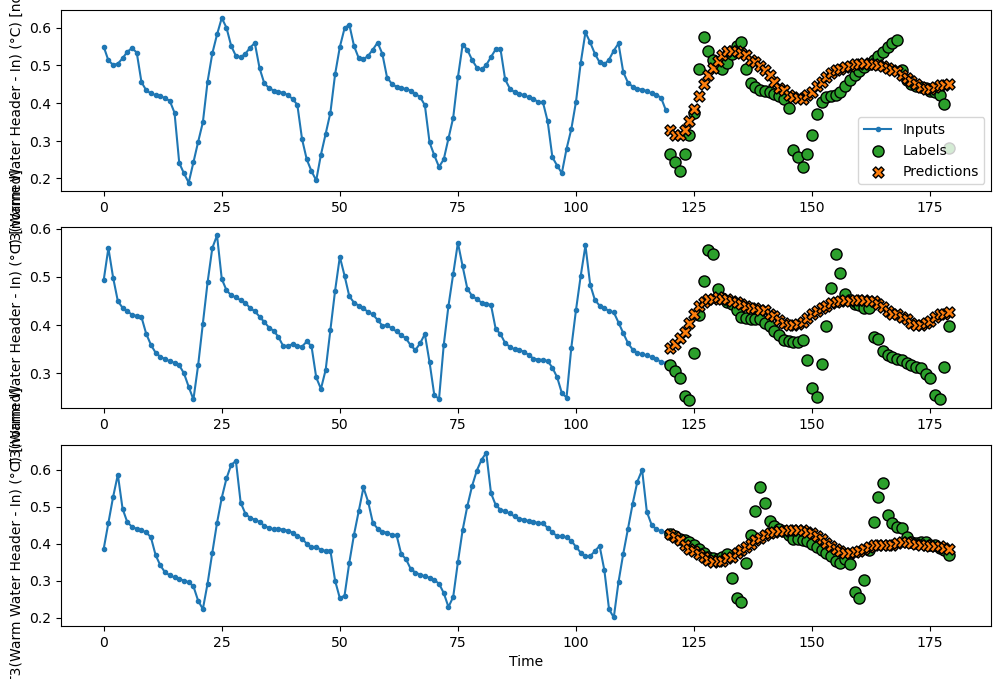

c1d-30-0.1-2048
Epoch 1/20
205/205 [==============================] - 51s 244ms/step - loss: 0.0974 - mean_absolute_error: 0.1631 - val_loss: 0.0405 - val_mean_absolute_error: 0.1273
Epoch 2/20
205/205 [==============================] - 50s 244ms/step - loss: 0.0693 - mean_absolute_error: 0.1356 - val_loss: 0.0465 - val_mean_absolute_error: 0.1407
Epoch 3/20
205/205 [==============================] - 50s 243ms/step - loss: 0.0658 - mean_absolute_error: 0.1310 - val_loss: 0.0393 - val_mean_absolute_error: 0.1317
Epoch 4/20
205/205 [==============================] - 50s 244ms/step - loss: 0.0630 - mean_absolute_error: 0.1266 - val_loss: 0.0381 - val_mean_absolute_error: 0.1252
Epoch 5/20
205/205 [==============================] - 50s 244ms/step - loss: 0.0632 - mean_absolute_error: 0.1265 - val_loss: 0.0411 - val_mean_absolute_error: 0.1311
Epoch 6/20
205/205 [==============================] - 50s 244ms/step - loss: 0.0610 - mean_absolute_error: 0.1231 - val_loss: 0.0365 - val_mean_absol

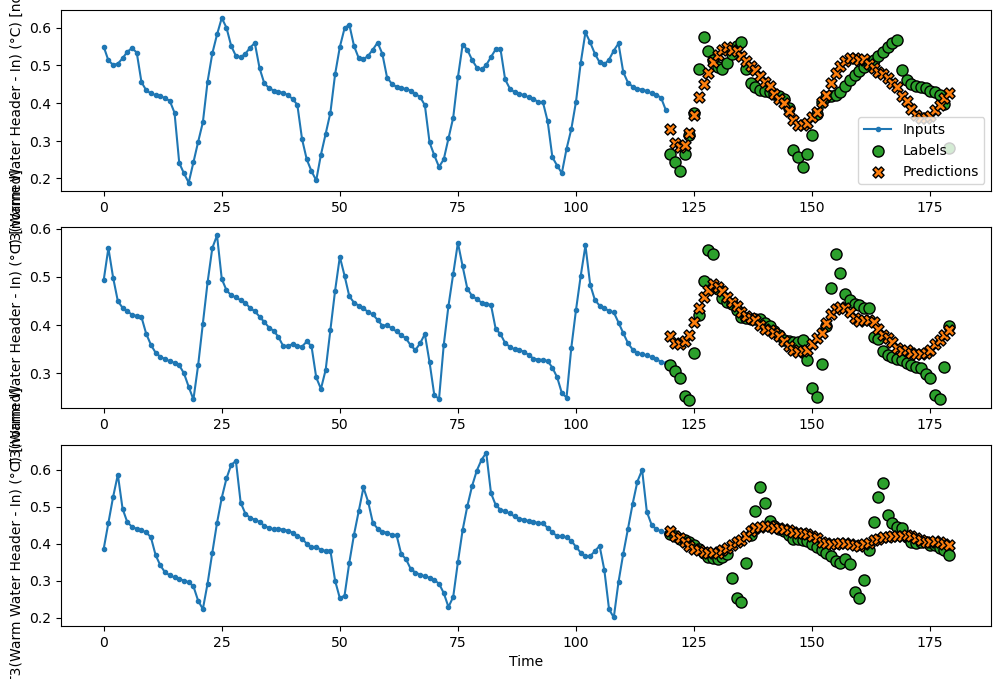

c1d-30-0.2-256
Epoch 1/20
205/205 [==============================] - 13s 57ms/step - loss: 0.1270 - mean_absolute_error: 0.1931 - val_loss: 0.0508 - val_mean_absolute_error: 0.1570
Epoch 2/20
205/205 [==============================] - 12s 56ms/step - loss: 0.0788 - mean_absolute_error: 0.1528 - val_loss: 0.0418 - val_mean_absolute_error: 0.1334
Epoch 3/20
205/205 [==============================] - 12s 55ms/step - loss: 0.0762 - mean_absolute_error: 0.1492 - val_loss: 0.0398 - val_mean_absolute_error: 0.1292
Epoch 4/20
205/205 [==============================] - 12s 56ms/step - loss: 0.0742 - mean_absolute_error: 0.1468 - val_loss: 0.0408 - val_mean_absolute_error: 0.1342
Epoch 5/20
59/59 [==============================] - 2s 35ms/step - loss: 0.0405 - mean_absolute_error: 0.1346


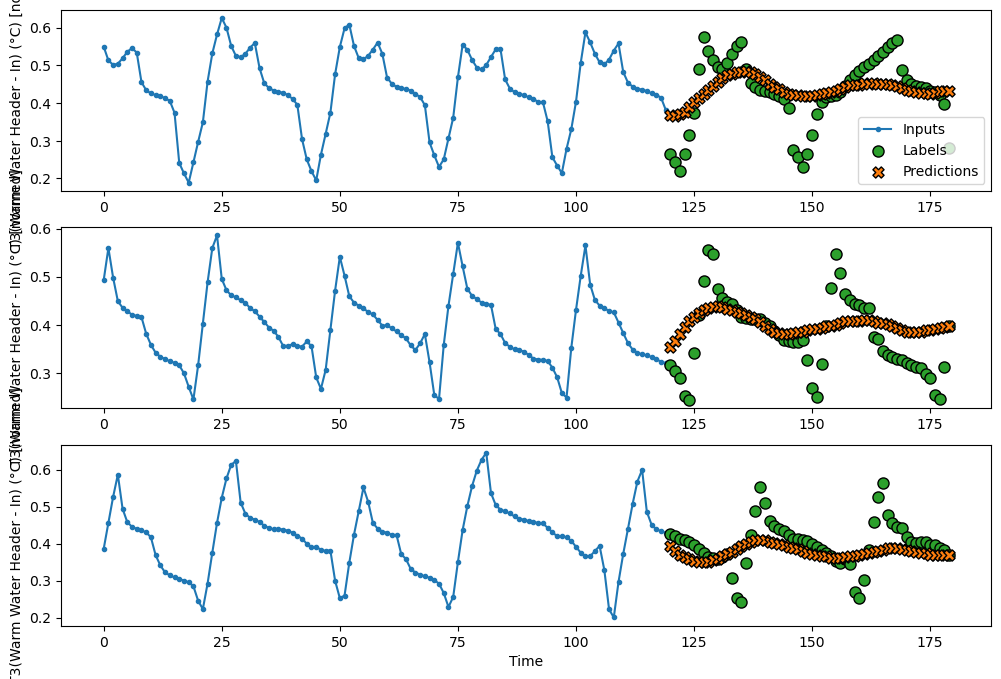

c1d-30-0.2-512
Epoch 1/20
205/205 [==============================] - 16s 70ms/step - loss: 0.1175 - mean_absolute_error: 0.1827 - val_loss: 0.0460 - val_mean_absolute_error: 0.1406
Epoch 2/20
205/205 [==============================] - 15s 70ms/step - loss: 0.0750 - mean_absolute_error: 0.1457 - val_loss: 0.0412 - val_mean_absolute_error: 0.1304
Epoch 3/20
205/205 [==============================] - 15s 70ms/step - loss: 0.0727 - mean_absolute_error: 0.1430 - val_loss: 0.0400 - val_mean_absolute_error: 0.1299
Epoch 4/20
205/205 [==============================] - 15s 69ms/step - loss: 0.0699 - mean_absolute_error: 0.1391 - val_loss: 0.0377 - val_mean_absolute_error: 0.1240
Epoch 5/20
205/205 [==============================] - 15s 70ms/step - loss: 0.0688 - mean_absolute_error: 0.1378 - val_loss: 0.0385 - val_mean_absolute_error: 0.1275
Epoch 6/20
59/59 [==============================] - 3s 38ms/step - loss: 0.0380 - mean_absolute_error: 0.1251


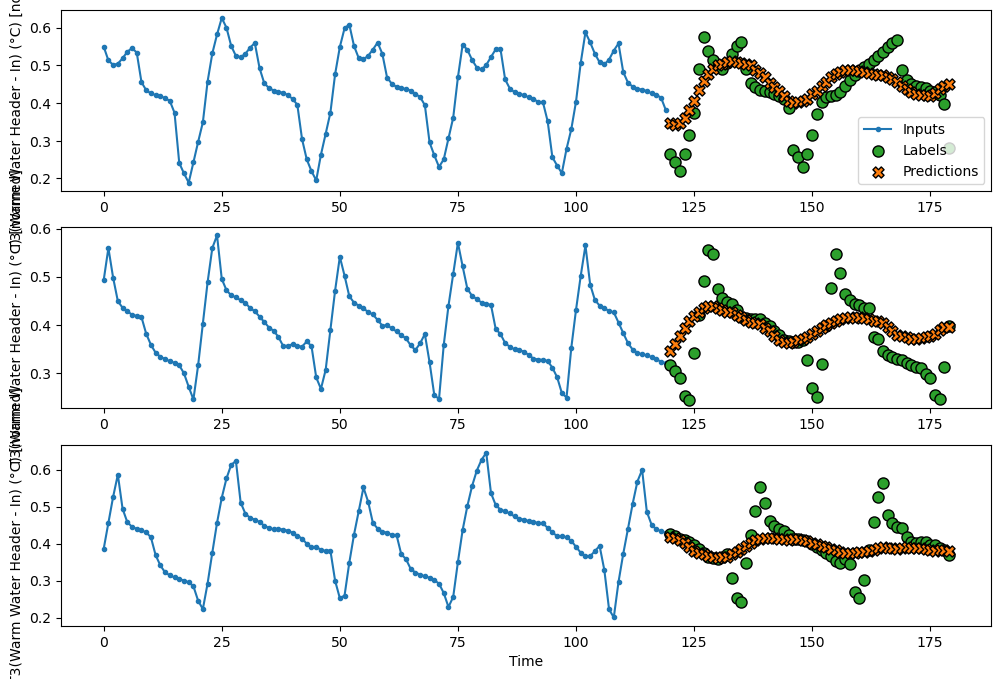

c1d-30-0.2-1024
Epoch 1/20
205/205 [==============================] - 24s 111ms/step - loss: 0.1066 - mean_absolute_error: 0.1725 - val_loss: 0.0399 - val_mean_absolute_error: 0.1305
Epoch 2/20
205/205 [==============================] - 23s 108ms/step - loss: 0.0736 - mean_absolute_error: 0.1427 - val_loss: 0.0404 - val_mean_absolute_error: 0.1300
Epoch 3/20
205/205 [==============================] - 25s 119ms/step - loss: 0.0694 - mean_absolute_error: 0.1368 - val_loss: 0.0378 - val_mean_absolute_error: 0.1247
Epoch 4/20
205/205 [==============================] - 23s 110ms/step - loss: 0.0708 - mean_absolute_error: 0.1389 - val_loss: 0.0405 - val_mean_absolute_error: 0.1281
Epoch 5/20
59/59 [==============================] - 3s 49ms/step - loss: 0.0379 - mean_absolute_error: 0.1256


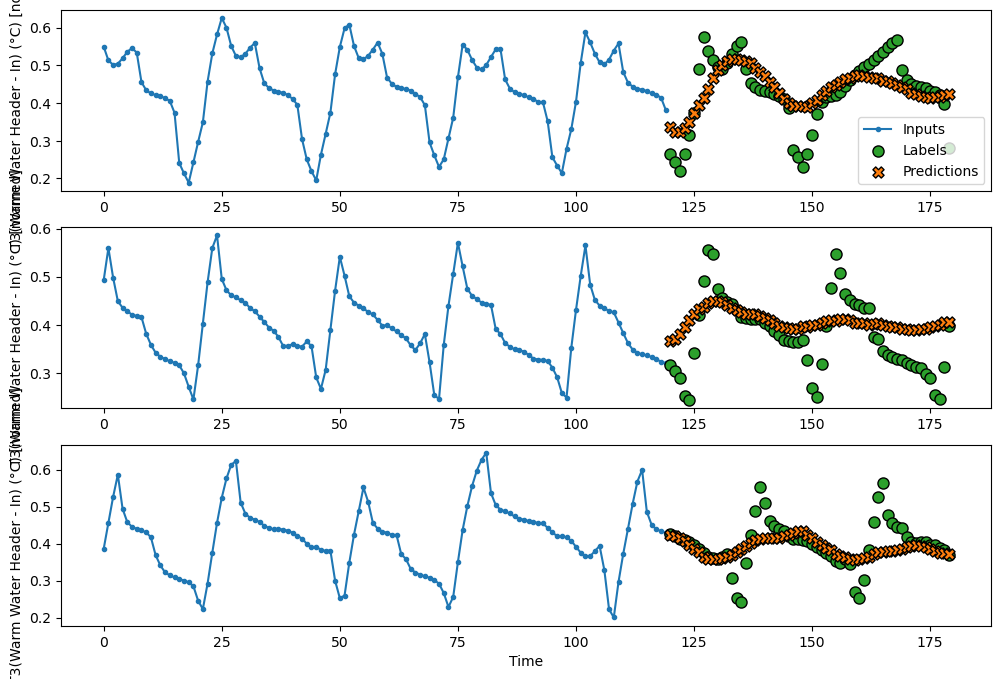

c1d-30-0.2-2048
Epoch 1/20
205/205 [==============================] - 51s 244ms/step - loss: 0.1031 - mean_absolute_error: 0.1685 - val_loss: 0.0443 - val_mean_absolute_error: 0.1374
Epoch 2/20
205/205 [==============================] - 51s 246ms/step - loss: 0.0714 - mean_absolute_error: 0.1398 - val_loss: 0.0389 - val_mean_absolute_error: 0.1273
Epoch 3/20
205/205 [==============================] - 50s 244ms/step - loss: 0.0688 - mean_absolute_error: 0.1361 - val_loss: 0.0369 - val_mean_absolute_error: 0.1216
Epoch 4/20
205/205 [==============================] - 50s 244ms/step - loss: 0.0680 - mean_absolute_error: 0.1349 - val_loss: 0.0382 - val_mean_absolute_error: 0.1258
Epoch 5/20
59/59 [==============================] - 5s 85ms/step - loss: 0.0446 - mean_absolute_error: 0.1391


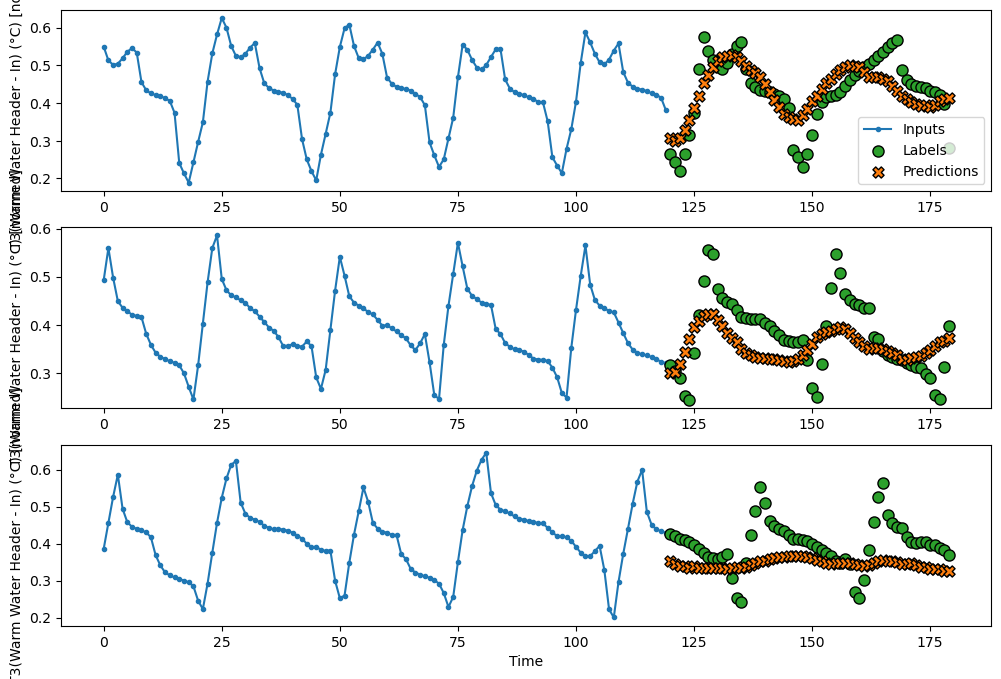

c1d-30-0.3-256
Epoch 1/20
205/205 [==============================] - 13s 57ms/step - loss: 0.1365 - mean_absolute_error: 0.2054 - val_loss: 0.0536 - val_mean_absolute_error: 0.1624
Epoch 2/20
205/205 [==============================] - 12s 57ms/step - loss: 0.0874 - mean_absolute_error: 0.1659 - val_loss: 0.0415 - val_mean_absolute_error: 0.1322
Epoch 3/20
205/205 [==============================] - 12s 58ms/step - loss: 0.0834 - mean_absolute_error: 0.1603 - val_loss: 0.0408 - val_mean_absolute_error: 0.1320
Epoch 4/20
205/205 [==============================] - 12s 56ms/step - loss: 0.0813 - mean_absolute_error: 0.1575 - val_loss: 0.0405 - val_mean_absolute_error: 0.1327
Epoch 5/20
205/205 [==============================] - 12s 57ms/step - loss: 0.0806 - mean_absolute_error: 0.1565 - val_loss: 0.0420 - val_mean_absolute_error: 0.1370
Epoch 6/20
59/59 [==============================] - 2s 34ms/step - loss: 0.0406 - mean_absolute_error: 0.1352


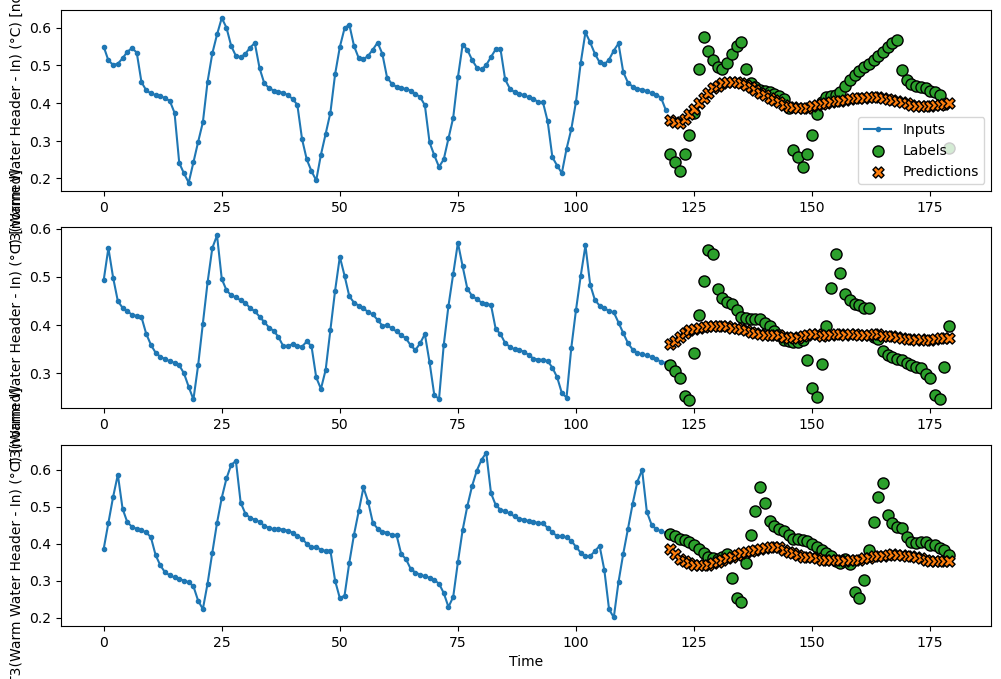

c1d-30-0.3-512
Epoch 1/20
205/205 [==============================] - 16s 71ms/step - loss: 0.1201 - mean_absolute_error: 0.1888 - val_loss: 0.0492 - val_mean_absolute_error: 0.1528
Epoch 2/20
205/205 [==============================] - 15s 72ms/step - loss: 0.0794 - mean_absolute_error: 0.1538 - val_loss: 0.0432 - val_mean_absolute_error: 0.1365
Epoch 3/20
205/205 [==============================] - 15s 71ms/step - loss: 0.0777 - mean_absolute_error: 0.1507 - val_loss: 0.0392 - val_mean_absolute_error: 0.1239
Epoch 4/20
205/205 [==============================] - 15s 72ms/step - loss: 0.0751 - mean_absolute_error: 0.1474 - val_loss: 0.0405 - val_mean_absolute_error: 0.1376
Epoch 5/20
59/59 [==============================] - 3s 38ms/step - loss: 0.0420 - mean_absolute_error: 0.1389


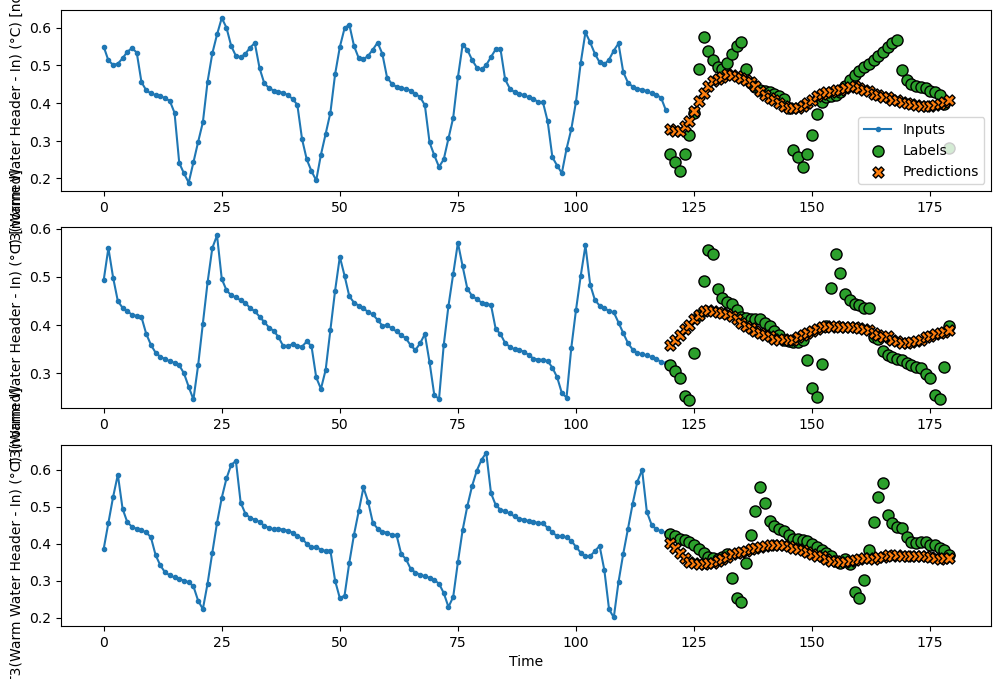

c1d-30-0.3-1024
Epoch 1/20
205/205 [==============================] - 24s 110ms/step - loss: 0.1101 - mean_absolute_error: 0.1790 - val_loss: 0.0433 - val_mean_absolute_error: 0.1364
Epoch 2/20
205/205 [==============================] - 23s 110ms/step - loss: 0.0759 - mean_absolute_error: 0.1469 - val_loss: 0.0388 - val_mean_absolute_error: 0.1259
Epoch 3/20
205/205 [==============================] - 23s 109ms/step - loss: 0.0743 - mean_absolute_error: 0.1450 - val_loss: 0.0418 - val_mean_absolute_error: 0.1343
Epoch 4/20
59/59 [==============================] - 3s 50ms/step - loss: 0.0420 - mean_absolute_error: 0.1369


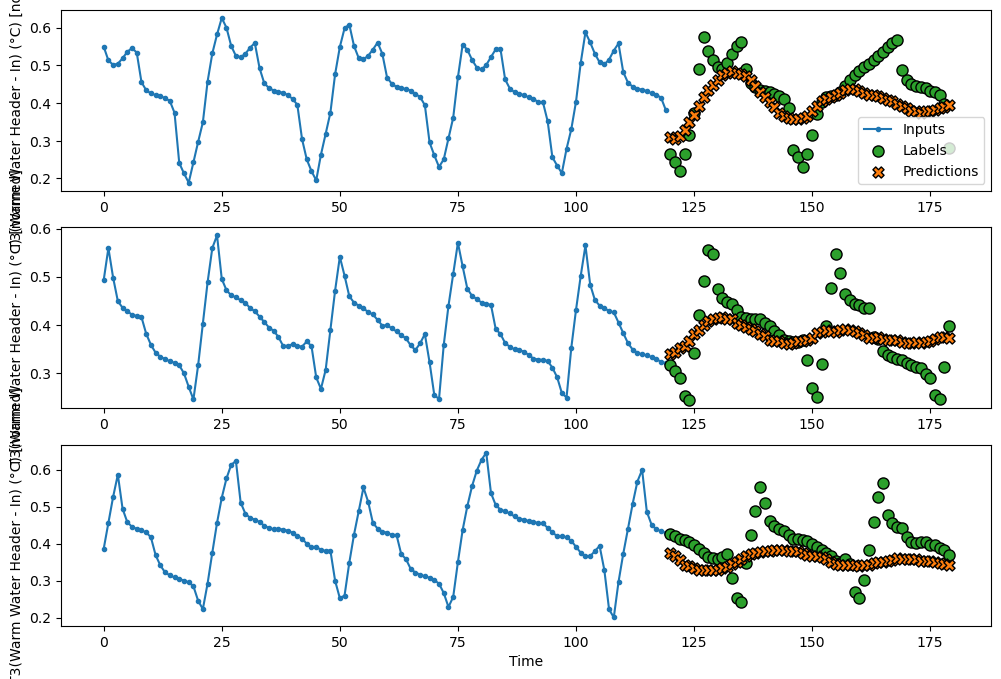

c1d-30-0.3-2048
Epoch 1/20
205/205 [==============================] - 52s 247ms/step - loss: 0.1043 - mean_absolute_error: 0.1721 - val_loss: 0.0402 - val_mean_absolute_error: 0.1292
Epoch 2/20
205/205 [==============================] - 51s 250ms/step - loss: 0.0756 - mean_absolute_error: 0.1459 - val_loss: 0.0421 - val_mean_absolute_error: 0.1336
Epoch 3/20
59/59 [==============================] - 5s 83ms/step - loss: 0.0407 - mean_absolute_error: 0.1320


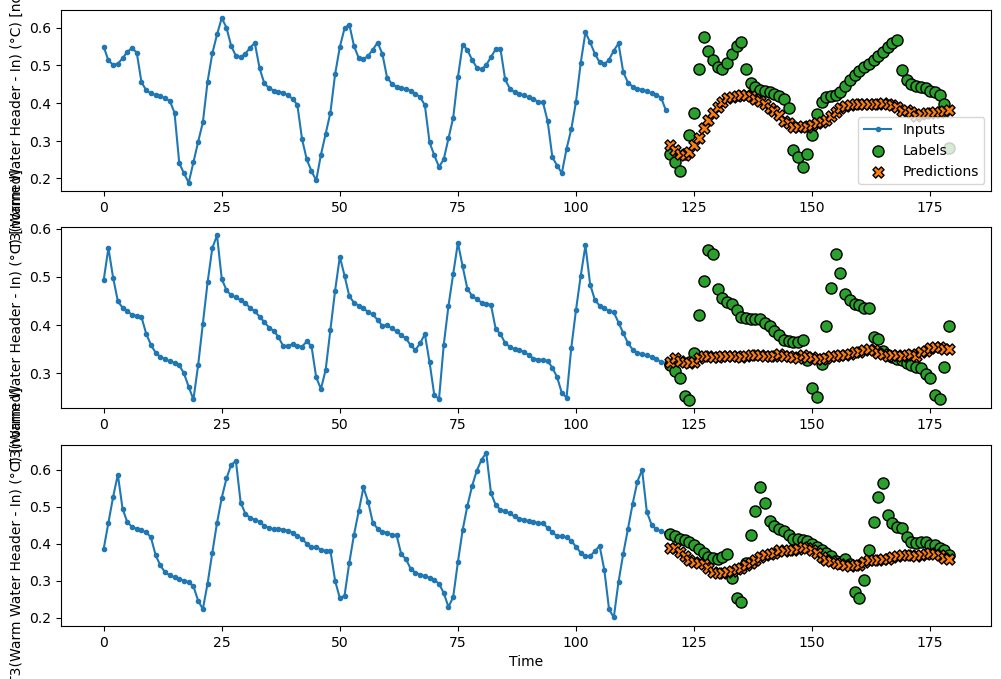

In [16]:
for CONV_WIDTH in [10, 20, 30]:
    for dropout in [0.1, 0.2, 0.3]:
        for nn in [256, 512, 1024, 2048]:
            #CONV_WIDTH = 30
            print(f'c1d-{CONV_WIDTH}-{dropout}-{nn}')
            multi_lstm_model = tf.keras.Sequential([
                tf.keras.layers.Lambda(lambda x: x[:, -CONV_WIDTH:, :]),
                # Shape => [batch, 1, conv_units]
                tf.keras.layers.Conv1D(nn, activation='relu', kernel_size=(CONV_WIDTH)),
                tf.keras.layers.Dropout(dropout),
                tf.keras.layers.Dense(nn, activation='relu'),
                tf.keras.layers.Dropout(dropout),
                # Shape => [batch, 1,  out_steps*features]
                tf.keras.layers.Dense(OUT_STEPS*num_features,
                                      kernel_initializer=tf.initializers.zeros()),
                # Shape => [batch, out_steps, features]
                tf.keras.layers.Reshape([OUT_STEPS, num_features]),
            ])

            history = compile_and_fit(multi_lstm_model, multi_window)

            multi_val_performance[f'c1d-{CONV_WIDTH}-{dropout}-{nn}'] = multi_lstm_model.evaluate(multi_window.val)
            multi_window.plot(multi_lstm_model, plot_col=df.columns[0])
            plt.show()
            #multi_performance['LSTM'] = multi_lstm_model.evaluate(multi_window.test, verbose=0)

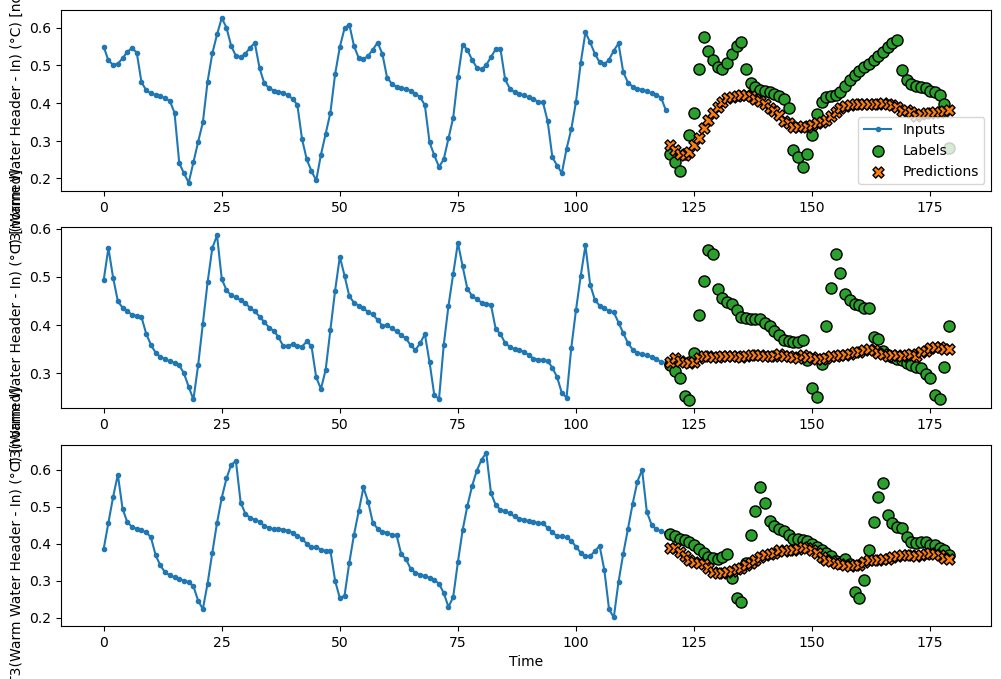

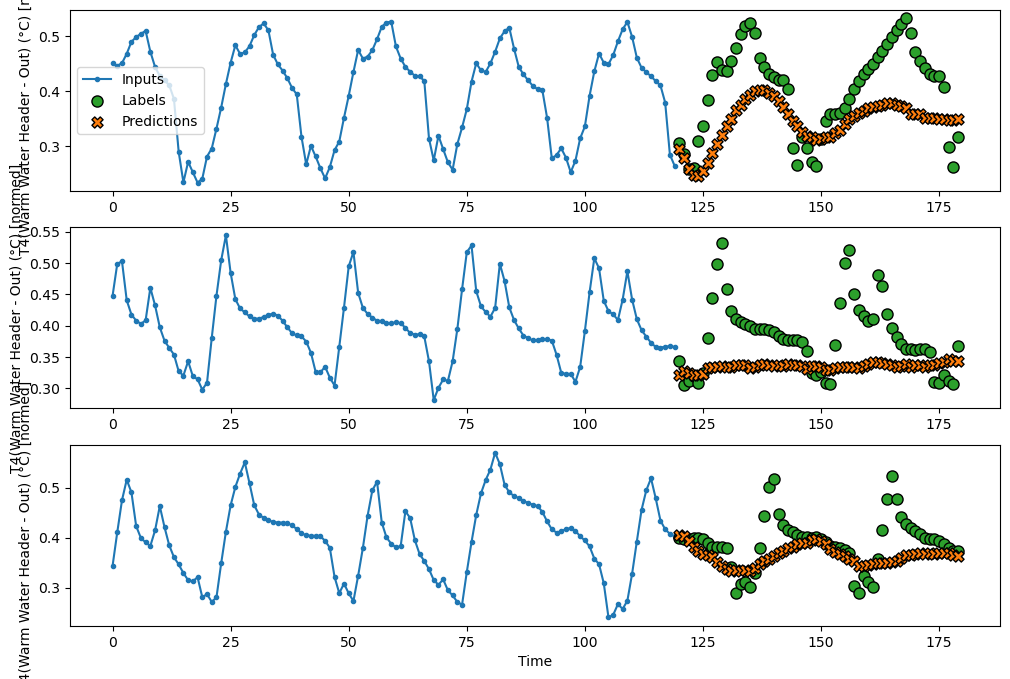

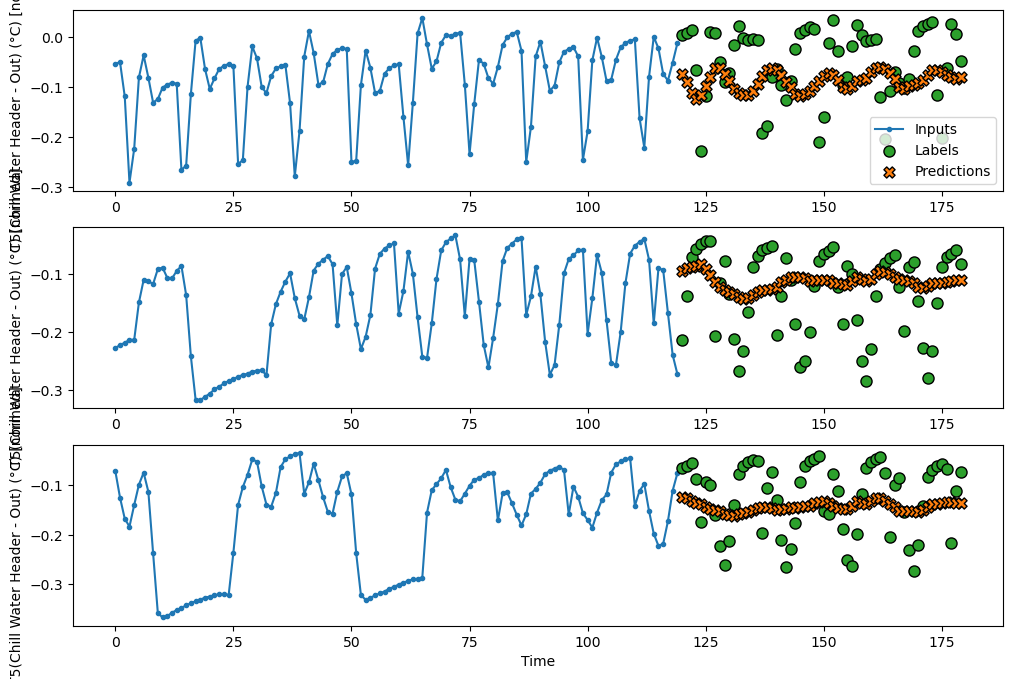

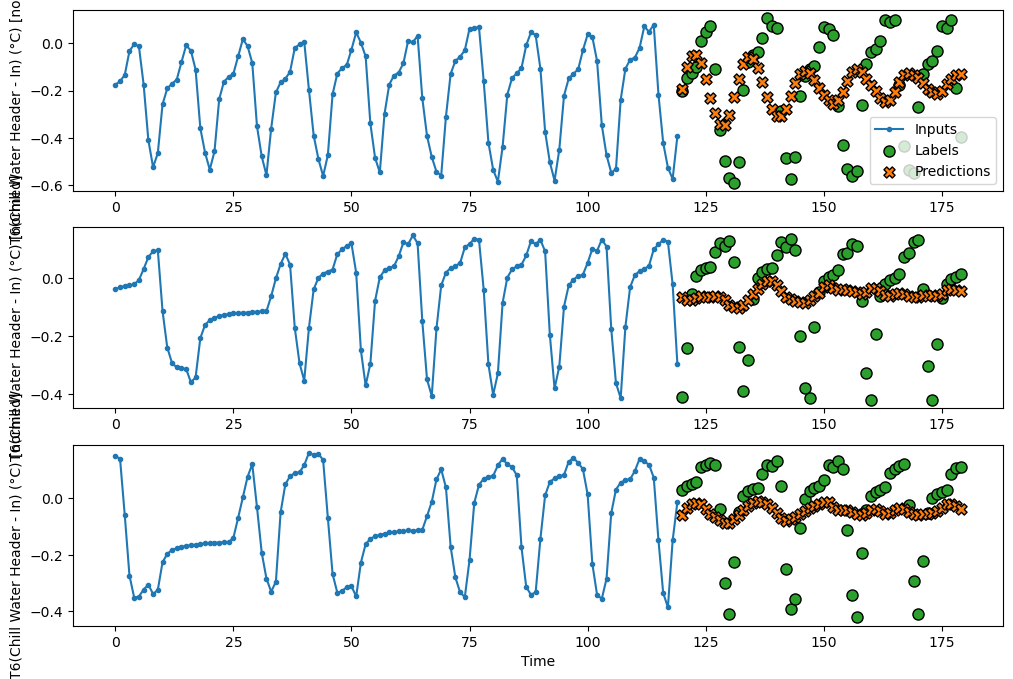

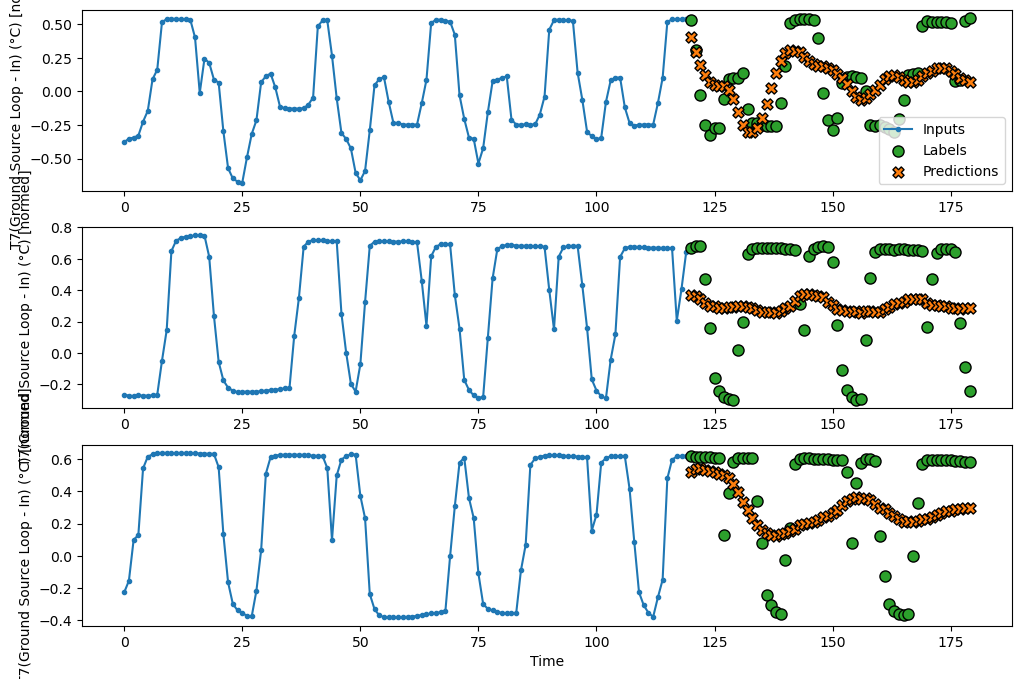

In [17]:
for i in range(5):
    multi_window.plot(multi_lstm_model, plot_col=df.columns[i])